<a href="https://colab.research.google.com/github/AbhinavNautiyal123/playstore_app_analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Problem Statement**


1. What is the distribution of the Rating, Size, and Price columns?

2. What is the distribution of the categorical columns in the Play Store dataset?

3. Is there any relationship between the number of Installs and the Rating, Size, or Reviews?

4. What is the average rating for each app category, and how do installs vary across different categories?

5. Do apps that update frequently have more installs?

6. Which type of app has more installs (free or paid), and which has the highest number of ratings and average size?

7. Which size range has the maximum number of installs and the highest average rating?

8. What are the top 20 apps having the most installs, the highest price, and the largest size?

9. Which categories of apps generate the most revenue, and which specific apps are the top revenue earners in these categories?

10. How does the number of apps vary across different categories over time?

11. How have app sizes and prices changed over time?

12. How does content rating affect the number of installs and price?

13. What is the distribution of Sentiment, Sentiment Polarity, and Sentiment Subjectivity?

14. What is the average Sentiment Polarity and Sentiment Subjectivity for each category?

# **GitHub Link -**

https://github.com/AbhinavNautiyal123/playstore_app_analysis/blob/main/Play_Store_App_Review_Analysis.ipynb

#### **Define Your Business Objective?**

Enhance the performance and profitability of apps on the Play Store by understanding user behavior, improving app features, optimizing marketing strategies, and identifying high-potential categories.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### **Import Libraries**

In [115]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None)
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

### **Dataset Loading**

In [116]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
playstore_df=pd.read_csv("/content/drive/MyDrive/dataset/Play Store Data (1).csv")
user_df=pd.read_csv("/content/drive/MyDrive/dataset/User Reviews (2).csv")

In [118]:
#copy of dataset
playstore_copy=playstore_df.copy()

### **Dataset First View**

In [119]:
# Dataset First Look

#playstore_df
playstore_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [120]:
#user_df
user_df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

### **Dataset Rows & Columns count**

In [121]:
# Dataset Rows & Columns count
print(f"Number of rows in playstore_df is {playstore_df.shape[0]} and number of columns {playstore_df.shape[1]}")
print(f"Number of rows in user_df is {user_df.shape[0]} and number of columns {user_df.shape[1]}")

Number of rows in playstore_df is 10841 and number of columns 13
Number of rows in user_df is 64295 and number of columns 5


### **Dataset Information**

In [122]:
# Dataset Info

#1. playstore_df
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [123]:
#2 user_df
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### **Duplicate Values**

In [124]:
# Dataset Duplicate Value Count

#1. playstore_df
print("number of duplicate rows in playstore_df is ",playstore_df.duplicated().sum())

number of duplicate rows in playstore_df is  483


In [125]:
#2. User_df
print("number of duplicate rows in playstore_df is ",user_df.duplicated().sum())

number of duplicate rows in playstore_df is  33616


#### **Missing Values/Null Values**

In [126]:
# Missing Values/Null Values Count
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [127]:
#2. user_df
user_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Since, There are almost 41% values are Null in user_df dataset

In [128]:
# Visualizing the missing values
playstore_df[playstore_df.isnull()]

App Category  Rating Reviews Size Installs Type Price Content Rating  \
0      NaN      NaN     NaN     NaN  NaN      NaN  NaN   NaN            NaN   
1      NaN      NaN     NaN     NaN  NaN      NaN  NaN   NaN            NaN   
2      NaN      NaN     NaN     NaN  NaN      NaN  NaN   NaN            NaN   
3      NaN      NaN     NaN     NaN  NaN      NaN  NaN   NaN            NaN   
4      NaN      NaN     NaN     NaN  NaN      NaN  NaN   NaN            NaN   
...    ...      ...     ...     ...  ...      ...  ...   ...            ...   
10836  NaN      NaN     NaN     NaN  NaN      NaN  NaN   NaN            NaN   
10837  NaN      NaN     NaN     NaN  NaN      NaN  NaN   NaN            NaN   
10838  NaN      NaN     NaN     NaN  NaN      NaN  NaN   NaN            NaN   
10839  NaN      NaN     NaN     NaN  NaN      NaN  NaN   NaN            NaN   
10840  NaN      NaN     NaN     NaN  NaN      NaN  NaN   NaN            NaN   

      Genres Last Updated Current Ver Android Ver  
0        NaN          NaN         NaN         NaN  
1        NaN          NaN         NaN         NaN  
2        NaN          NaN         NaN         NaN  
3        NaN          NaN         NaN         NaN  
4        NaN          NaN         NaN         NaN  
...      ...          ...         ...         ...  
10836    NaN          NaN         NaN         NaN  
10837    NaN          NaN         NaN         NaN  
10838    NaN          NaN         NaN         NaN  
10839    NaN          NaN         NaN         NaN  
10840    NaN          NaN         NaN         NaN  

[10841 rows x 13 columns]

### **What did you know about your dataset?**

There are 10841 rows and 13 columns present in playstore_df dataset
There are 483 duplicate rows present in this dataset
Almost 1474 values in rating column are null  


## ***2. Understanding Your Variables***

In [129]:
# Dataset Columns
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [130]:
# Dataset Describe
playstore_df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

### **Variables Description**


1. **App**: The name of the application.

2. **Category**: The category to which the app belongs (e.g., "GAME", "PRODUCTIVITY").

3. **Rating**: The average user rating of the app on a scale of 1 to 5.
Reviews: The number of user reviews the app has received.

4. **Size**: The size of the app

5. **Installs**: The number of times the app has been installed

6. **Type** : Indicates whether the app is free or paid ("Free" or "Paid").

7. **Price**: The price of the app (e.g., "0" for free apps, otherwise the price in a given currency).

8. **Content Rating**: The age group for which the app is appropriate (e.g., "Everyone", "Teen").

9. **Genres**: The genres of the app

10. **Last Updated**: The date when the app was last updated.

11. **Current Ver**: The current version of the app (e.g., "1.0.1").

12 **Android Ver**: The minimum required Android version to run the app (e.g., "4.1 and up").

### **Check Unique Values for each variable.**

In [131]:
# APP
playstore_df.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [132]:
# Category
playstore_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [133]:
#Rating
playstore_df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [134]:
#size
playstore_df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [135]:
#installs
playstore_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [136]:
#Type
playstore_df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [137]:
#Price
playstore_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [138]:
#Content Rating
playstore_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [139]:
#Genres
playstore_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [140]:
#Last updated
playstore_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [141]:
#Current Var
playstore_df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

## 3. ***Data Wrangling***

####**Analysing App column**

######**checking missing value**

In [142]:

playstore_df.App.isnull().sum()

0

#####**checking duplicate value**

In [143]:
#checking duplicate values
playstore_df.App.value_counts()

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64

In [144]:
#checking It
playstore_df[playstore_df.App=='ROBLOX']

App Category  Rating  Reviews Size      Installs  Type Price  \
1653  ROBLOX     GAME     4.5  4447388  67M  100,000,000+  Free     0   
1701  ROBLOX     GAME     4.5  4447346  67M  100,000,000+  Free     0   
1748  ROBLOX     GAME     4.5  4448791  67M  100,000,000+  Free     0   
1841  ROBLOX     GAME     4.5  4449882  67M  100,000,000+  Free     0   
1870  ROBLOX     GAME     4.5  4449910  67M  100,000,000+  Free     0   
2016  ROBLOX   FAMILY     4.5  4449910  67M  100,000,000+  Free     0   
2088  ROBLOX   FAMILY     4.5  4450855  67M  100,000,000+  Free     0   
2206  ROBLOX   FAMILY     4.5  4450890  67M  100,000,000+  Free     0   
4527  ROBLOX   FAMILY     4.5  4443407  67M  100,000,000+  Free     0   

     Content Rating                        Genres   Last Updated  \
1653   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1701   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1748   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1841   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1870   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2016   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2088   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2206   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
4527   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   

       Current Ver Android Ver  
1653  2.347.225742  4.1 and up  
1701  2.347.225742  4.1 and up  
1748  2.347.225742  4.1 and up  
1841  2.347.225742  4.1 and up  
1870  2.347.225742  4.1 and up  
2016  2.347.225742  4.1 and up  
2088  2.347.225742  4.1 and up  
2206  2.347.225742  4.1 and up  
4527  2.347.225742  4.1 and up

#####**Handling duplicate values**

In [145]:
playstore_df.drop_duplicates(subset='App',inplace=True)

In [146]:
#checking After droping duplicates
playstore_df.App.value_counts()

App
Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: count, Length: 9660, dtype: int64

In [147]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

####**Analysing Category column**

######**checking missing value**

In [148]:

playstore_df.Category.isnull().sum()

0

#####**checking duplicate value**

In [149]:
#checking duplicate values
playstore_df.Category.value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [150]:
#checking unique values
playstore_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [151]:
#The category called 1.9 looks suspicious to me
playstore_df[playstore_df.Category=='1.9']

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

There are several issues with this row. The 'Category' field is mislabeled, the 'Rating' exceeds the maximum value of 5 (with a value of 19), and the 'Installs' field incorrectly shows 'Free.' Given these errors, it would be best to remove this row

In [152]:
#remove row 10472
playstore_df.drop(10472,inplace=True)

In [153]:
playstore_df.drop_duplicates(subset='App',inplace=True)

#####**Analysing Rating column**

######**checking missing value**

In [154]:

playstore_df.Rating.isnull().sum()

1463

In [155]:
#Visualising missing values
playstore_df[playstore_df.Rating.isnull()]

App             Category  Rating  \
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

      Reviews  Size  Installs  Type Price Content Rating  \
23         61  7.0M  100,000+  Free     0       Everyone   
113       182  5.7M  100,000+  Free     0   Everyone 10+   
123       119  3.7M   50,000+  Free     0       Everyone   
126       654  7.4M  100,000+  Free     0           Teen   
129        77  2.9M   10,000+  Free     0     Mature 17+   
...       ...   ...       ...   ...   ...            ...   
10824      67   82M   10,000+  Free     0       Everyone   
10825       7  7.7M      100+  Free     0           Teen   
10831      38  9.8M    5,000+  Free     0       Everyone   
10835       0  9.6M       10+  Free     0       Everyone   
10838       3  9.5M    1,000+  Free     0       Everyone   

                                Genres        Last Updated Current Ver  \
23     Art & Design;Action & Adventure       March 7, 2018       1.0.0   
113                             Beauty  September 20, 2017         8.0   
123                             Beauty       July 23, 2018         1.3   
126                             Beauty       July 17, 2018        1.15   
129                             Beauty      August 8, 2017         2.0   
...                                ...                 ...         ...   
10824                          Medical       July 31, 2018       2.2.2   
10825                           Social    February 2, 2018         1.0   
10831                Maps & Navigation       June 13, 2018   2.0.148.0   
10835                         Business  September 29, 2016       1.1.5   
10838                          Medical    January 20, 2017         1.0   

      Android Ver  
23     4.1 and up  
113    3.0 and up  
123    4.1 and up  
126    4.1 and up  
129    2.3 and up  
...           ...  
10824  4.4 and up  
10825  4.0 and up  
10831  4.0 and up  
10835  4.0 and up  
10838  2.2 and up  

[1463 rows x 13 columns]

#####**Handling Missing values**


I will fill the missing ratings with the average rating of each respective category.

In [156]:
x=playstore_df.groupby('Category')['Rating'].mean().reset_index()

In [157]:
def Fill_Rating(row):
    if pd.isnull(row['Rating']):
        return x[x['Category'] == row['Category']]['Rating'].values[0]
    else:
        return row['Rating']

playstore_df['Rating'] = playstore_df.apply(Fill_Rating, axis=1)

In [158]:
#check
playstore_df.Rating.isnull().sum()

0

#####**Outliers detection**

In [159]:
playstore_df.Rating.describe()

count    9659.000000
mean        4.172230
std         0.495593
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<Axes: >

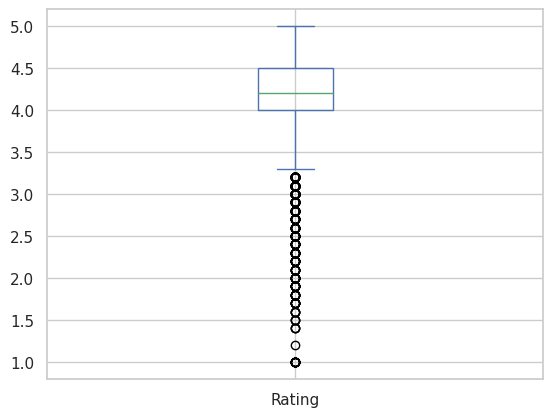

In [160]:
playstore_df.Rating.plot(kind='box')

There are not any outlier present in this column

####**Analysing Reviews column**

In [161]:
#checking null value
playstore_df.Reviews.isnull().sum()

0

In [162]:
#checking unique values
playstore_df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [163]:
#dtype
playstore_df.Reviews.dtype

dtype('O')

dtype of this column is object instead of integer

#####**Changing dtype**

In [164]:
playstore_df['Reviews']=playstore_df['Reviews'].astype(int)

In [165]:
#Check
playstore_df.Reviews.dtype

dtype('int64')

####**Analysing Size column**

In [166]:
#checking null values
playstore_df.Size.isnull().sum()

0

In [167]:
#checking unique values
playstore_df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

The size of apps is in different format like M(MB),k(KB) and 'Varied with device'

#####**Handling values in size column**

I am gonna convert all of the values which are in Kb in to Mbs and i will drop those rows having value varied with device

In [168]:
#Removing M ,K from values and converting them in MBs
playstore_df['Size']=playstore_df['Size'].apply(lambda x: float(x.replace('M',"")) if 'M' in x else (float(x.replace("K",""))/1024 if 'K' in x else np.nan))
#remove Varied with device values
playstore_df = playstore_df[playstore_df['Size'].notnull()]

#renaming size column to Size_in_mb
playstore_df.rename(columns={'Size':'Size_in_MB'},inplace=True)


In [169]:
#check
playstore_df.Size_in_MB.unique()

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   2.7,   5.5,  17. ,  39. ,
        31. ,   4.2,   7. ,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,
        11. ,  24. ,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,   7.9,
        56. ,  57. ,  35. ,  54. ,   3.6,   5.7,   8.6,   2.4,  27. ,
         2.5,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,  32. ,   5.4,
        18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,   6.7,  30. ,
         2.6,   7.1,   3.7,  22. ,   7.4,   6.4,   3.2,   8.2,   9.9,
         4.9,   9.5,   5. ,   5.9,  13. ,  73. ,   6.8,   3.5,   4. ,
         2.3,   7.2,   2.1,  42. ,   7.3,   9.1,  55. ,   6.5,   1.5,
         7.5,  51. ,  41. ,  48. ,   8.5,  46. ,   8.3,   4.3,   4.7,
         3.3,  40. ,   7.8,   8.8,   6.6,   5.1,  61. ,  66. ,   8.4,
        44. ,   1.6,   6.2,  53. ,   1.4,   3. ,   5.8,   3.8,   9.6,
        45. ,  63. ,  49. ,  77. ,   4.4,   4.8,  70. ,   6.9,   9.3,
         8.1,  36. ,

####**Analysing Installs column**




In [170]:
#missing values
playstore_df.Installs.isnull().sum()

0

In [171]:
#unique_values
playstore_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

Here we can see some problems, such as the Rating column being in an object format instead of a numeric format. We need to convert it to the correct format before proceeding.

#####**Changing_dtype**

In [172]:
playstore_df['Installs']=playstore_df.Installs.str.replace("+","").str.replace(",","").astype(int)

In [173]:
#checking
playstore_df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,         50,        100,        500,
               10,          1,          5, 1000000000,          0])

####**Analysing Type column**

In [174]:
#missing values
playstore_df.Type.isnull().sum()

0

In [175]:
#unique_values
playstore_df.Type.unique()

array(['Free', 'Paid'], dtype=object)

####**Analyising Price column**

In [176]:
#checking missing values
playstore_df.Price.isnull().sum()

0

In [177]:
#checking unque values
playstore_df.Price.unique()

array(['0', '$4.99', '$6.99', '$1.49', '$3.99', '$7.99', '$5.99', '$2.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99',
       '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00', '$3.88',
       '$25.99', '$399.99', '$17.99', '$400.00', '$3.02', '$1.76',
       '$4.84', '$4.77', '$1.61', '$1.59', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$8.99', '$1.96', '$19.40', '$15.46', '$3.04', '$4.29',
       '$2.60', '$3.28', '$4.60', '$28.99', '$10.99', '$2.90', '$1.97',
       '$200.00', '$89.99', '$2.56', '$30.99', '$3.61', '$394.99',
       '$1.26', '$6.49', '$1.20'], dtype=object)

Price should be in Float format instead of object

#####**Changing dtype**

First i will remove '$' sign and then i will change its datatype

In [178]:
playstore_df['Price']=playstore_df.Price.str.strip().str.replace("$","").astype(float).apply(lambda x: round(x))

In [179]:
#checking
playstore_df.Price.unique()

array([  0,   5,   7,   1,   4,   8,   6,   3,   2,  10,   9,  25,  12,
        80,  17,  15,  30,  13,  20,  16,  34,  75,  40,  26, 400,  18,
        14, 300, 380,  38,  19, 390,  47, 110, 155,  29,  11, 200,  90,
        31, 395])

####**Analysing Content Rating column**

In [180]:
#checking null values
playstore_df['Content Rating'].isnull().sum()

0

In [181]:
#checking unique values
playstore_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [182]:
#checking count of each category
playstore_df['Content Rating'].value_counts()

Content Rating
Everyone           6615
Teen                889
Mature 17+          338
Everyone 10+        272
Adults only 18+       2
Unrated               2
Name: count, dtype: int64

In [183]:
#checking unrated category
y=playstore_df.groupby('Category')['Content Rating'].agg(lambda x: x.mode().iloc[0]).reset_index()
playstore_df[playstore_df['Content Rating']=='Unrated']

App Category    Rating  Reviews  Size_in_MB  \
7312     Best CG Photography   FAMILY  4.179664        1         2.5   
8266  DC Universe Online Map    TOOLS  4.100000     1186         6.4   

      Installs  Type  Price Content Rating         Genres       Last Updated  \
7312       500  Free      0        Unrated  Entertainment      June 24, 2015   
8266     50000  Free      0        Unrated          Tools  February 27, 2012   

     Current Ver   Android Ver  
7312         5.2    3.0 and up  
8266         1.3  2.3.3 and up

#####**Fixing  categories in This column**

I am going to replace the unrated values with the mode value of the content rating in their respective categories

**Handling Unrated category**

In [184]:
most_frequent_rating = playstore_df[playstore_df['Content Rating'] != 'Unrated'].groupby('Category')['Content Rating'].agg(lambda x: x.mode().iloc[0])

def fill_unrated(row):
    if row['Content Rating'] == 'Unrated':
        return most_frequent_rating[row['Category']]
    return row['Content Rating']

playstore_df['Content Rating'] = playstore_df.apply(fill_unrated, axis=1)

In [185]:
#checking
playstore_df[playstore_df['Content Rating']=='Unrated']

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size_in_MB, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [186]:
playstore_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

####**Analysing Genres column**

In [187]:
#checking unique values
playstore_df.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulat

In [188]:
playstore_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

The 'Category' and 'Genres' columns contain the same information, so it's better to delete one of them. I am going to delete the 'Genres' column.

In [189]:
#deleting Genres column
playstore_df.drop(columns='Genres',axis=1,inplace=True)

In [190]:
#checking
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_MB', 'Installs',
       'Type', 'Price', 'Content Rating', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

####**Analysing Last Updated column**

In [191]:
#checking missing values
playstore_df['Last Updated'].isnull().sum()

0

In [192]:
#checking unique values
playstore_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'August 5, 2017', 'June 19, 2016', 'January 20, 2014'],
      dtype=object)

The dtype of this column should be datetime instead of object

In [193]:
playstore_df['Last Updated']=pd.to_datetime(playstore_df['Last Updated'],format='%B %d, %Y')

In [194]:
#checking
playstore_df['Last Updated'].dtype

dtype('<M8[ns]')

####**Analysing Android Ver And Current Ver column**

In [195]:
#checking missing values
playstore_df['Android Ver'].isnull().sum()

2

In [196]:
#checking unique values
playstore_df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '5.0 and up',
       '6.0 and up', '1.6 and up', '2.1 and up', '2.2 and up',
       '5.1 and up', '1.5 and up', '7.0 and up', '4.3 and up',
       '4.0.3 - 7.1.1', '2.3.3 and up', 'Varies with device',
       '3.2 and up', '4.4W and up', '2.0 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '7.1 and up',
       '2.0.1 and up', '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up',
       '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

I dont think this Android Ver and Current Ver is not important for our analysis , so i am droping this columns

In [197]:
playstore_df.drop(columns=['Android Ver','Current Ver'],axis=1,inplace=True)

In [198]:
playstore_df

App        Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                    Coloring book moana  ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3                                  Sketch - Draw & Paint  ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
...                                                  ...             ...   
10835                                           FR Forms        BUSINESS   
10836                                   Sya9a Maroc - FR          FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings          FAMILY   
10838                             Parkinson Exercices FR         MEDICAL   
10840      iHoroscope - 2018 Daily Horoscope & Astrology       LIFESTYLE   

         Rating  Reviews  Size_in_MB  Installs  Type  Price Content Rating  \
0      4.100000      159        19.0     10000  Free      0       Everyone   
1      3.900000      967        14.0    500000  Free      0       Everyone   
2      4.700000    87510         8.7   5000000  Free      0       Everyone   
3      4.500000   215644        25.0  50000000  Free      0           Teen   
4      4.300000      967         2.8    100000  Free      0       Everyone   
...         ...      ...         ...       ...   ...    ...            ...   
10835  4.098479        0         9.6        10  Free      0       Everyone   
10836  4.500000       38        53.0      5000  Free      0       Everyone   
10837  5.000000        4         3.6       100  Free      0       Everyone   
10838  4.166552        3         9.5      1000  Free      0       Everyone   
10840  4.500000   398307        19.0  10000000  Free      0       Everyone   

      Last Updated  
0       2018-01-07  
1       2018-01-15  
2       2018-08-01  
3       2018-06-08  
4       2018-06-20  
...            ...  
10835   2016-09-29  
10836   2017-07-25  
10837   2018-07-06  
10838   2017-01-20  
10840   2018-07-25  

[8118 rows x 10 columns]

###**Feature Engeneering**

#####**Creating Rating_type column**

 I am creating a new column called Rating_type from the Rating column, categorizing the ratings as follows: 'low rated' if the rating is less than 2, 'average rated' if the rating is between 2 and 4 , and 'highly rated' if the rating is greater than 4

In [199]:
playstore_df.insert(playstore_df.columns.get_loc('Rating')+1,'Rating_type',np.nan)
playstore_df['Rating_type']=playstore_df['Rating'].apply(lambda x : 'Low' if x<2 else ('Average' if x>=2 and x<4 else 'High'))

In [200]:
#check
playstore_df.sample(10)

App   Category  Rating Rating_type  \
6609                      Blood Pressure Diary     FAMILY     4.6        High   
5332                           Ayat - Al Quran     FAMILY     4.7        High   
8130                                    CZ-USA  LIFESTYLE     4.5        High   
5108                      Lakeside AG Moultrie  LIFESTYLE     5.0        High   
10611               Beacon Baptist Jupiter, FL  LIFESTYLE     5.0        High   
10310               Deposit Calculator FD & RD    FINANCE     4.4        High   
2077         Intellijoy Early Learning Academy     FAMILY     4.3        High   
3931                               Like A Boss     FAMILY     4.4        High   
4644                                 Channel U     FAMILY     4.6        High   
4837   Pixel Z Gunner 3D - Battle Survival Fps       GAME     4.2        High   

       Reviews  Size_in_MB  Installs  Type  Price Content Rating Last Updated  
6609        47         3.3      5000  Free      0       Everyone   2018-08-01  
5332    173394         8.5   5000000  Free      0       Everyone   2018-03-13  
8130        11         3.4      1000  Free      0       Everyone   2016-03-01  
5108         3         8.6        50  Free      0       Everyone   2017-05-23  
10611       14         2.6       100  Free      0       Everyone   2017-10-13  
10310       18         3.4     10000  Free      0       Everyone   2017-01-21  
2077       160        67.0     50000  Free      0       Everyone   2018-06-18  
3931     17069        94.0    500000  Free      0   Everyone 10+   2018-08-01  
4644        34        14.0      1000  Free      0       Everyone   2018-05-21  
4837     11408        96.0   1000000  Free      0           Teen   2018-07-06

In [201]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Rating_type', 'Reviews', 'Size_in_MB',
       'Installs', 'Type', 'Price', 'Content Rating', 'Last Updated'],
      dtype='object')

#####**Creating Size_range column**

I am creating a new column called Size_range from the Size_in_MB column, categorizing the sizes into the following ranges: 'below 1' for sizes less than 1, '1-10' for sizes between 1 and 10 , '10-20' for sizes between 10 and 20 , '20-30' for sizes between 20 and 30 , '30-40' for sizes between 30 and 40 , '40-50' for sizes between 40 and 50 , '50-60' for sizes between 50 and 60 , '60-70' for sizes between 60 and 70 , '70-80' for sizes between 70 and 80 , '80-90' for sizes between 80 and 90 , and 'above 90' for sizes greater than 90.

In [202]:

def Size_range(row):
  if row < 1:
    return 'Below 1'
  elif 1<=row<10:
    return '1-10'
  elif 10<=row <20:
    return '10-20'
  elif 20<= row <30:
    return '20-30'
  elif 30<=row <40:
    return '30-40'
  elif 40<=row<50:
    return '40-50'
  elif 50<=row<60:
    return '50-60'
  elif 60<=row<70:
    return '60-70'
  elif 70<=row<80:
    return '70-80'
  elif 80<=row<90:
    return '80-90'
  else:
    return '90 and above'

playstore_df.insert(playstore_df.columns.get_loc('Size_in_MB')+1,'Size_range',np.nan)
playstore_df['Size_range']=playstore_df['Size_in_MB'].apply(Size_range)


In [203]:
#check
playstore_df.sample(5)

App            Category  \
8208  DB Sound Meter: Measure Noise Level- Decibel M...               TOOLS   
7954                    Resume Builder and CV maker app        PRODUCTIVITY   
5454                                AP App for Android™  NEWS_AND_MAGAZINES   
7037                                    BZ Reminder PRO            BUSINESS   
6666                      Left vs Right: Brain Training              FAMILY   

      Rating Rating_type  Reviews  Size_in_MB Size_range  Installs  Type  \
8208     4.3        High      824         2.8       1-10     10000  Free   
7954     4.3        High     2303        15.0      10-20    100000  Free   
5454     3.6     Average      188         9.9       1-10     10000  Free   
7037     4.8        High      726         5.4       1-10      1000  Paid   
6666     4.5        High    75719        30.0      30-40   5000000  Free   

      Price Content Rating Last Updated  
8208      0       Everyone   2017-12-13  
7954      0       Everyone   2018-08-02  
5454      0       Everyone   2016-05-12  
7037      4       Everyone   2017-12-20  
6666      0       Everyone   2017-11-24

### **What all manipulations have you done and insights you found?**

1. **Removed Duplicate Apps**: I identified and removed duplicate entries in the App column to ensure each app is unique in the dataset.

2. **Deleted Specific Row**: I removed the row with index number 10472 to maintain data integrity.

3. **Filled Missing Ratings**: There were approximately 1,463 missing values in the Rating column. I filled these missing values with the average rating of their respective categories.

4. **Converted Reviews to Integer**: I changed the data type of the Review column from object to integer to facilitate numerical analysis.

5. **Standardized App Sizes**: The Size column had values in different formats (KB, MB) and some values as 'Varied with device'. I standardized all sizes to MB and renamed the column to Size_in_MB.

6. **Converted Installs to Integer**: I changed the data type of the Installs column from object to integer.

7. **Converted Price to Float**: I changed the data type of the Price column from object to float.

8. **Dropped Genre Column**: I observed that the Genre and Category columns contained redundant information, so I dropped the Genre column to eliminate redundancy.

9. **Converted Last Updated to Datetime**: I changed the data type of the Last Updated column from object to datetime to facilitate time-based analysis.

10. **Removed Unnecessary Columns**: I removed the Android Version and Current Version columns as they were not relevant to my analysis.

11. **Created Rating Type Column**: I created a new column called Rating_type from the Rating column, categorizing the ratings into 'low rated' (rating < 2), 'average rated' (2 <= rating < 4), and 'highly rated' (rating >= 4).

12. **Created Size Range Column**: I created a new column called Size_range from the Size_in_MB column, categorizing the app sizes into ranges such as 'below 1', '1-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', and 'above 90'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 What is the distribution of the Rating, Size, and Price columns?**

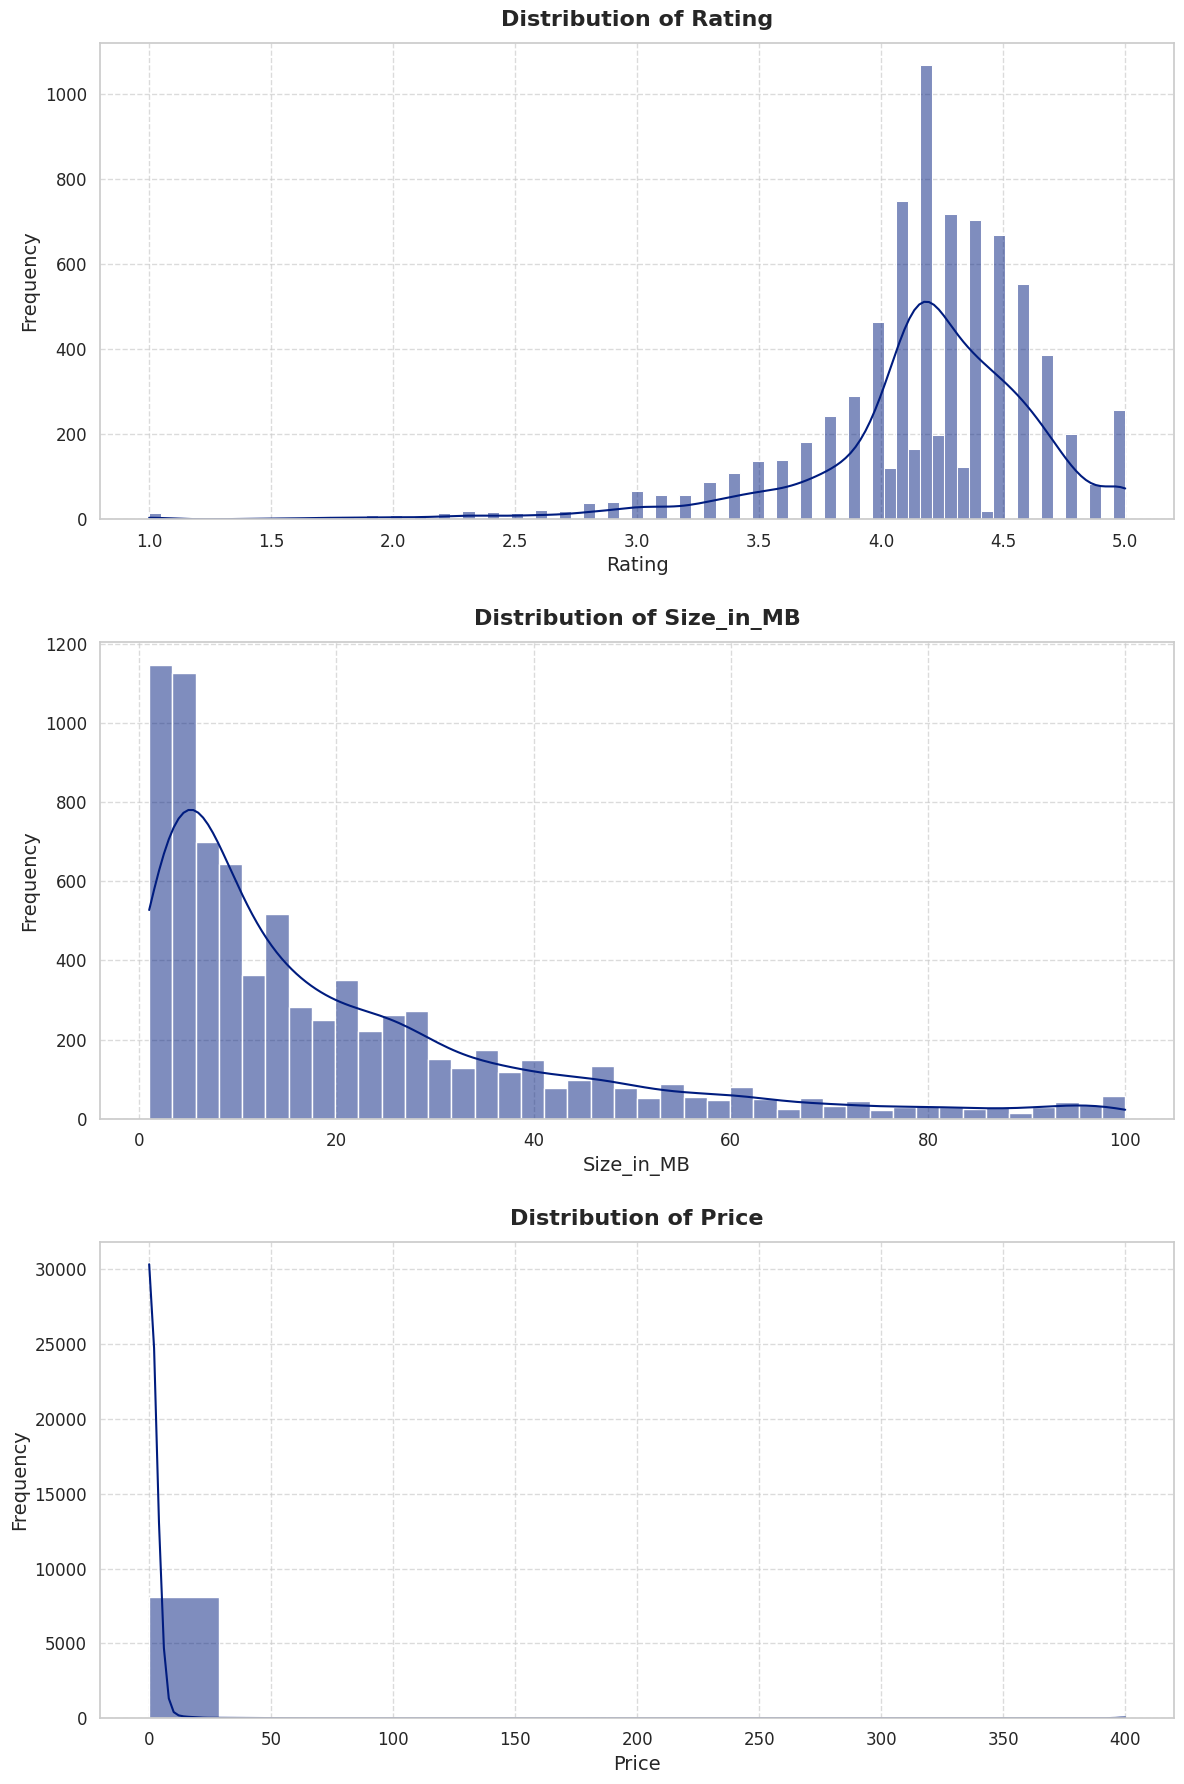

In [204]:

# Identify numerical columns
numerical_col = ['Rating', 'Size_in_MB', 'Price']

# Set the style and color palette
sns.set(style="whitegrid")
sns.set_palette("dark")

# Create subplots
fig, ax = plt.subplots(len(numerical_col), 1, figsize=(12, 18))

# Plot histograms
for i, col in enumerate(numerical_col):
    sns.histplot(data=playstore_df, x=col, kde=True, ax=ax[i], palette="dark")
    ax[i].set_title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=12)
    ax[i].set_xlabel(col, fontsize=14)
    ax[i].set_ylabel('Frequency', fontsize=14)
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    ax[i].grid(True, linestyle='--', alpha=0.7)

# Adjust layout and spacing
plt.tight_layout(h_pad=2)

# Display plot
plt.show()


##### **1. Why did you pick the specific chart?**

Histogram is best to visualise the distribution of numerical columns

##### **2. What is/are the insight(s) found from the chart?**

1. **Most apps are rated between 4 and 4.5**: This indicates that a significant number of apps are well-liked by users. Positive ratings typically lead to increased user satisfaction, higher retention rates, and potentially more downloads and usage, which can positively impact app visibility and revenue through advertising or premium features.

2. **Apps mostly have sizes between 0 and 20 MB**: Smaller app sizes make them more accessible and easier to download for users, especially those with limited storage space on their devices. This can lead to higher adoption rates and lower uninstall rates, contributing to better user engagement and satisfaction.

3. **Majority of the apps are Free**: Offering apps for free encourages wider adoption and lowers the barrier for users to try them out. Free apps can attract a larger user base, increase exposure through word-of-mouth and social sharing, and potentially lead to higher revenue through in-app advertisements, subscriptions, or purchases.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

 positive ratings, smaller app sizes, and a free pricing model can collectively enhance user satisfaction, broaden app accessibility, and potentially increase revenue streams through various monetization strategies. These factors are crucial for app developers and businesses aiming to succeed in the competitive app market.







#### **Chart - 2 What is the distribution of the categorical columns in the Play Store dataset**




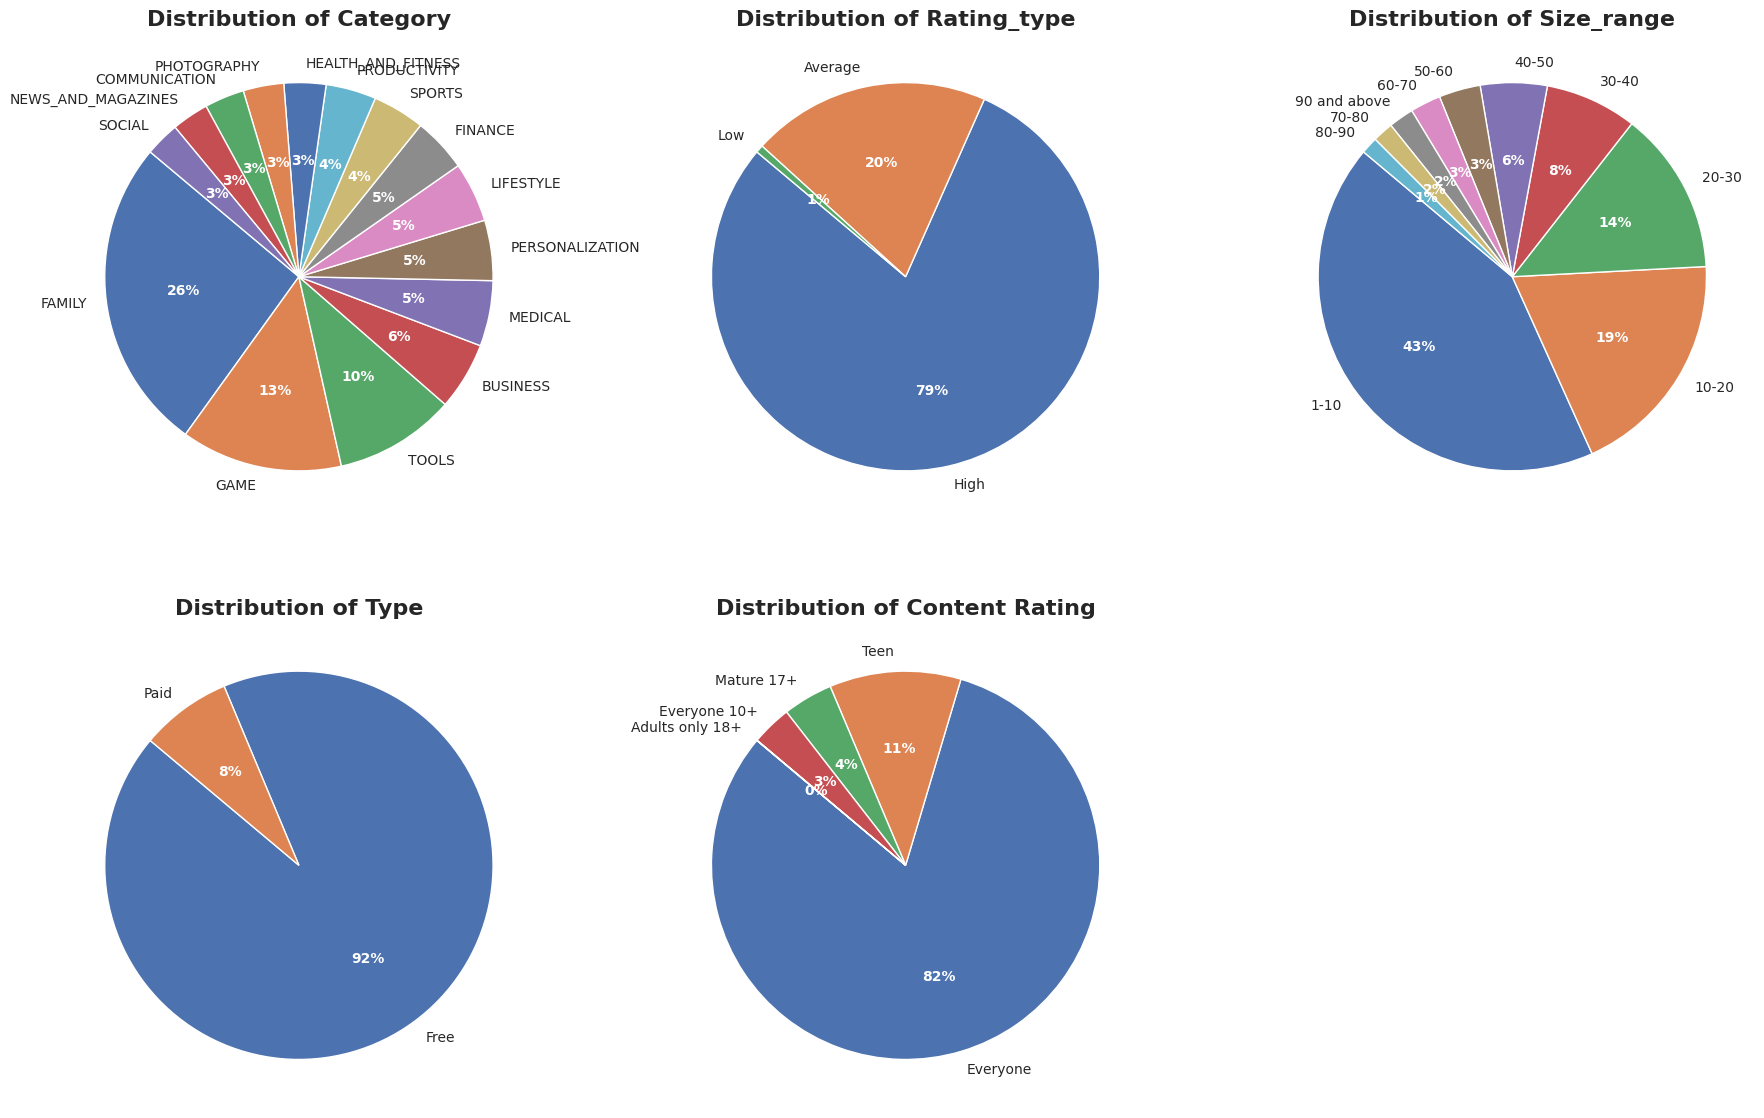

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Identify categorical columns
cat_col = [i for i in playstore_df.columns if playstore_df[i].dtype == 'object']

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
ax = ax.flatten()

# Plot pie charts for each categorical column
for i, col in enumerate(cat_col[1:]):
    temp = playstore_df[col].value_counts().sort_values(ascending=False).head(15)
    wedges, texts, autotexts = ax[i].pie(temp.values, labels=temp.index, autopct='%.0f%%',
                                         colors=sns.color_palette("deep"), startangle=140)

    # Customize pie chart
    for text in texts:
        text.set_fontsize(10)  # Reduce label font size
    for autotext in autotexts:
        autotext.set_fontsize(10)  # Reduce percentage font size
        autotext.set_color('white')
        autotext.set_weight('bold')

    # Set title
    ax[i].set_title(f'Distribution of {col}', fontsize=16, fontweight='bold')

# Remove any unused subplots
fig.delaxes(ax[5])


# Adjust layout
plt.tight_layout()
plt.show()


##### **1. Why did you pick the specific chart?**

Pie chart is best to show distribution of categorical column

##### **2. What is/are the insight(s) found from the chart?**

1. Most number of apps in Playstore are of family genre , following by Games ,tool,business and medical

2. 79% of apps in the Play Store are highly rated, which means having a rating greater than 4.
3. Almost 49% of apps in the Play Store are of 1–10 MB in size, and 80–90 MB of apps are least in number.
4. 92% of apps in the Play Store are free.
5. 81% of apps in the Play Store are for every age group of people, followed by teens.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

1. Developers and businesses can focus on these popular categories to reach a larger audience. Creating family-oriented apps can be particularly profitable due to their high demand. Expanding into Games, Tools, Business, and Medical categories can also attract specific user groups and increase market share.

2. High-rated apps can attract more users, leading to increased downloads and engagement. Maintaining high ratings is crucial for visibility in the app store

3. Developing smaller, optimized apps can lead to higher adoption rates, especially in regions with limited internet speeds and storage capacity. Ensuring apps are lightweight can improve user experience and reduce uninstall rates.

4. Offering free apps can lead to a larger user base. Businesses can monetize through in-app purchases, advertisements, or premium features

5. Developing apps that are suitable for all age groups can maximize the potential user base


#### **Chart - 3 Is there any relationship between the number of Installs and the Rating, Size, or Reviews?**

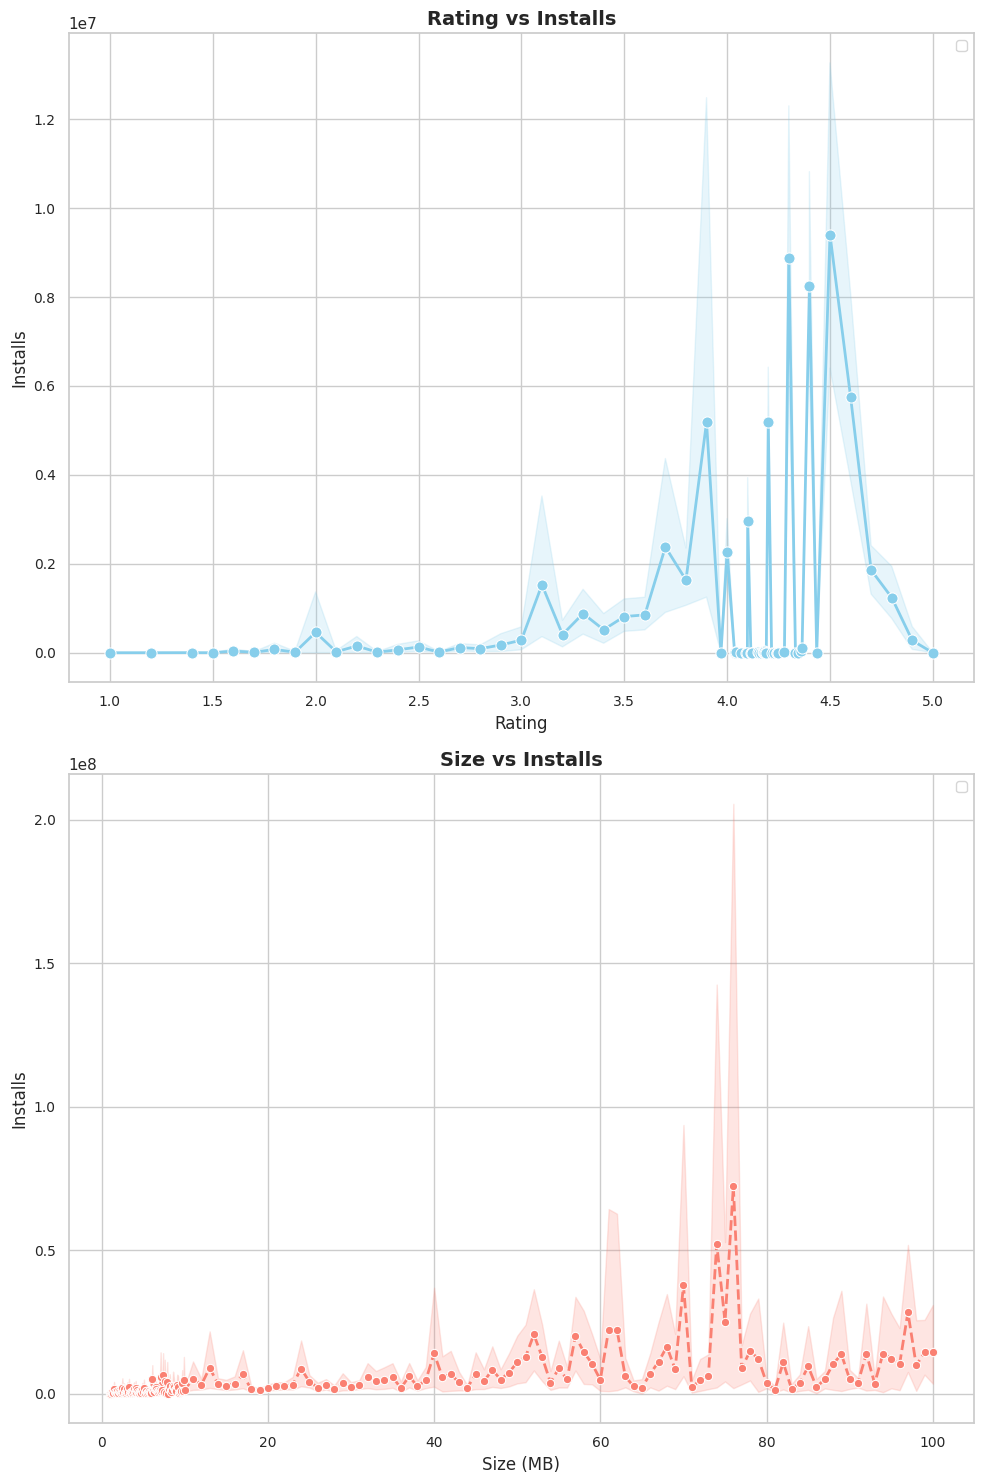

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure and axes
fig, ax = plt.subplots(2 ,1, figsize=(10, 15))


# Plot 1: Rating vs Installs
sns.lineplot(x='Rating', y='Installs', data=playstore_df, ax=ax[0], color='skyblue', marker='o', markersize=8, linestyle='-', linewidth=2)
ax[0].set_title('Rating vs Installs', fontsize=14,fontweight='bold')
ax[0].set_xlabel('Rating', fontsize=12)
ax[0].set_ylabel('Installs', fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=10)
ax[0].legend(fontsize=10)

# Plot 2: Size vs Installs with Reviews as marker size

sns.lineplot(x='Size_in_MB', y='Installs', data=playstore_df, ax=ax[1], color='salmon', marker='o', linestyle='--', linewidth=2)
ax[1].set_title('Size vs Installs', fontsize=14,fontweight='bold')
ax[1].set_xlabel('Size (MB)', fontsize=12)
ax[1].set_ylabel('Installs', fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=10)
ax[1].legend(fontsize=10)


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


##### **1. Why did you pick the specific chart?**

Apart from scatterplot line plot is best to check kind of relationship between two numerical columns

##### **2. What is/are the insight(s) found from the chart?**

**1st chart**
1. Apps with ratings between 4.0 and 4.5 tend to have the highest number of installs.
2. The number of installs sharply increases as the rating approaches 4.0 and maintains high levels up to around 4.5.

3. There is a drop-off in installs for apps with ratings below 3.0 and above 4.5.

**2nd chart**

1. The number of installs doesn't show a clear trend relative to app size.

2. Apps with a size range of approximately 60-80 MB show the highest number of installs.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**High Installs Concentration:**

Apps with higher ratings (around 4.0 to 4.5) and moderate sizes (60-80 MB) are more likely to be popular among users.

**User Preferences:**
Users tend to favor apps that have a balance between good ratings and moderate sizes. Apps that are too large or too small or have very high or low ratings are less likely to achieve high install numbers.

#### **Chart - 4 What is the average rating for each app category, and how do installs vary across different categories?**

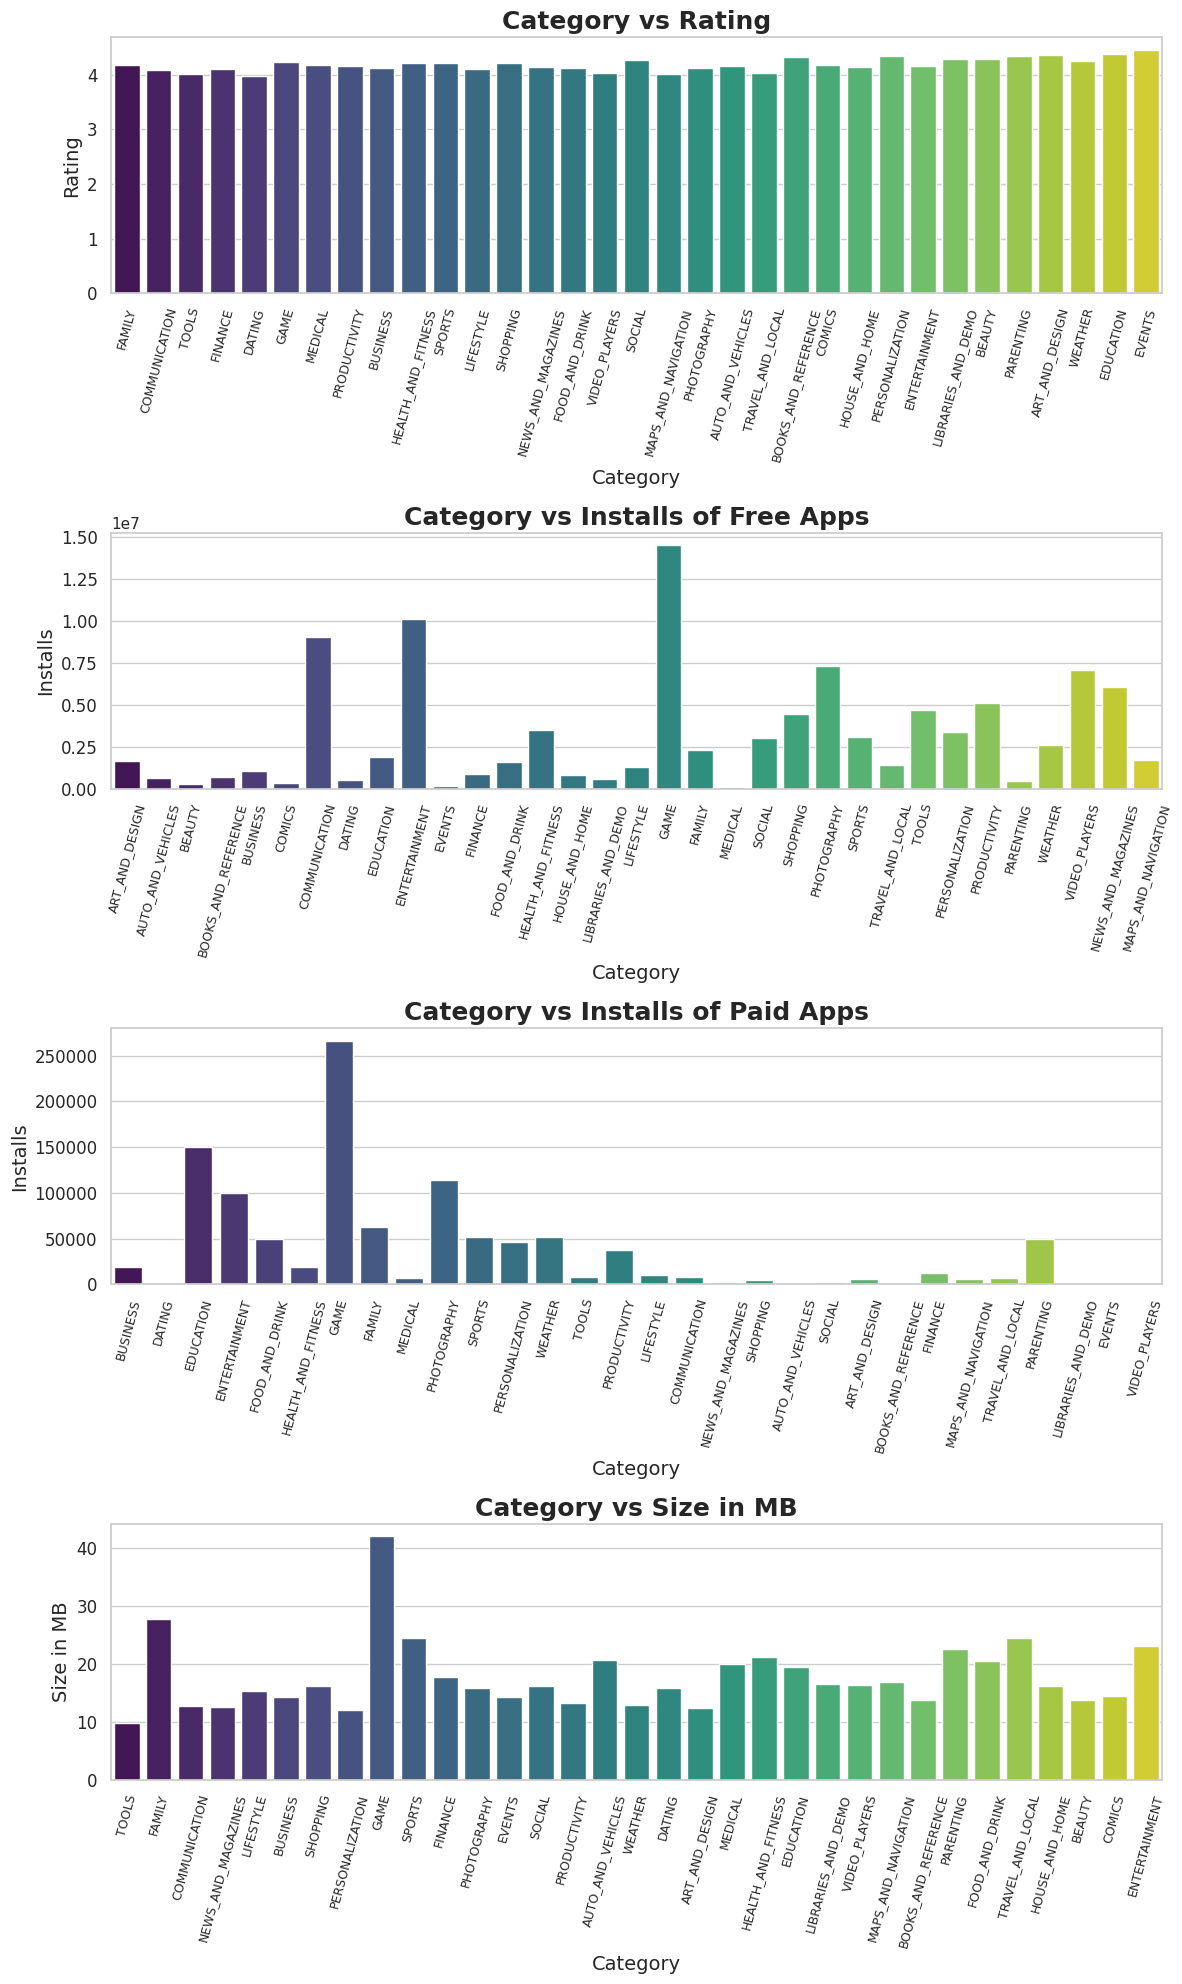

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="pastel")

# Create subplots
fig, ax = plt.subplots(4, 1, figsize=(12, 20))
plt.subplots_adjust(hspace=0.5)

# Define common properties
title_props = {'fontsize': 18, 'fontweight': 'bold'}
label_props = {'fontsize': 14}

# Plot 1: Category vs Rating
sns.barplot(x='Category', y='Rating', data=playstore_df.sort_values(by='Rating'), palette='viridis', ci=None, ax=ax[0])
ax[0].set_title('Category vs Rating', **title_props)
ax[0].set_xlabel('Category', **label_props)
ax[0].set_ylabel('Rating', **label_props)
ax[0].tick_params(axis='x', rotation=75, labelsize=9)
ax[0].tick_params(axis='y', labelsize=12)

# Plot 2: Category vs Installs of Free Apps
data_free = playstore_df[playstore_df['Type'] == 'Free']
sns.barplot(x='Category', y='Installs', data=data_free, palette='viridis', ci=None, ax=ax[1])
ax[1].set_title('Category vs Installs of Free Apps', **title_props)
ax[1].set_xlabel('Category', **label_props)
ax[1].set_ylabel('Installs', **label_props)
ax[1].tick_params(axis='x', rotation=75, labelsize=9)
ax[1].tick_params(axis='y', labelsize=12)

# Plot 3: Category vs Installs of Paid Apps
data_paid = playstore_df[playstore_df['Type'] == 'Paid']
sns.barplot(x='Category', y='Installs', data=data_paid, palette='viridis', ci=None, ax=ax[2])
ax[2].set_title('Category vs Installs of Paid Apps', **title_props)
ax[2].set_xlabel('Category', **label_props)
ax[2].set_ylabel('Installs', **label_props)
ax[2].tick_params(axis='x', rotation=75, labelsize=9)
ax[2].tick_params(axis='y', labelsize=12)

# Plot 4: Category vs Size in MB
sns.barplot(x='Category', y='Size_in_MB', data=playstore_df.sort_values(by='Size_in_MB'), palette='viridis', ci=None, ax=ax[3])
ax[3].set_title('Category vs Size in MB', **title_props)
ax[3].set_xlabel('Category', **label_props)
ax[3].set_ylabel('Size in MB', **label_props)
ax[3].tick_params(axis='x', rotation=75, labelsize=9)
ax[3].tick_params(axis='y', labelsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


##### **1. What is/are the insight(s) found from the chart?**

1. Most categories have average ratings that are close to or above 4.0. This indicates a generally high satisfaction level among users across different types of apps.

2.  Game,Entertainment,cummunication categories have the highest number of installs for free apps.

3. Game,Education and photography categories have the highest number of installs for paid apps.

4. Average size of apps in the Game category is large compared to other categories, followed by Family, Travel & Local, and Entertainment

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

1. If you are looking to develop a new app, consider focusing on categories that have high average ratings, such as Family, Communication, and Tools. High ratings can lead to better user engagement and retention.

2. If your business model involves offering free apps, target categories with high install rates, such as Games, Entertainment, and Cummunication. High download numbers can lead to more user data, ad revenue, and potential upselling opportunities.

3. If you are developing paid apps, consider focusing on categories like Games, Education, and Photography, which show higher install numbers for paid apps. This indicates a higher willingness of users to pay for quality content in these categories.

#### **Chart - 5 Do apps that update frequently have more installs?**

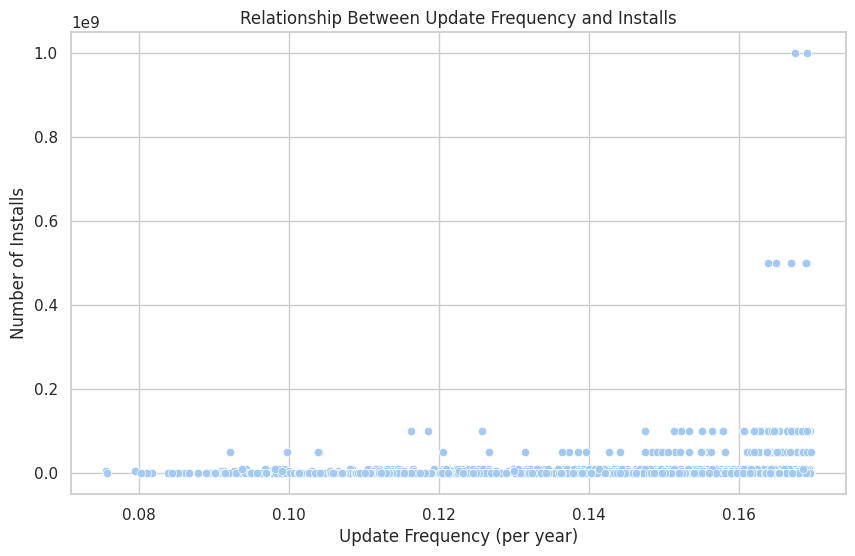

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Last Updated' to datetime format
x = pd.to_datetime(playstore_df['Last Updated'])

# Calculate days since last update for each app
y= (pd.to_datetime('today') -x).dt.days

# Calculate the update frequency (e.g., number of updates per year)
z = 365 / y

# Plot the relationship between update frequency and installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x=z, y='Installs', data=playstore_df)
plt.title('Relationship Between Update Frequency and Installs')
plt.xlabel('Update Frequency (per year)')
plt.ylabel('Number of Installs')
plt.grid(True)
plt.show()


##### **1. Why did you pick the specific chart?**

Scatterplot is best to see correlation between two numerical features

##### **2. What is/are the insight(s) found from the chart?**

There doesn’t appear to be a clear positive correlation between update frequency and the number of installs. Apps with higher update frequencies do not necessarily have more installs.

There are a few outliers with a very high number of installs (around 1 billion) even at lower update frequencies. This suggests that some apps achieve significant success without frequent updates.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Focus on Quality Over Frequency: Since there is no clear trend indicating that frequent updates lead to more installs, developers should prioritize the quality of updates over the quantity. Ensure that each update adds significant value, fixes critical issues, or enhances user experience.

#### **Chart - 6 Which type of app has more installs (free or paid), and which has the highest number of ratings and average size?**

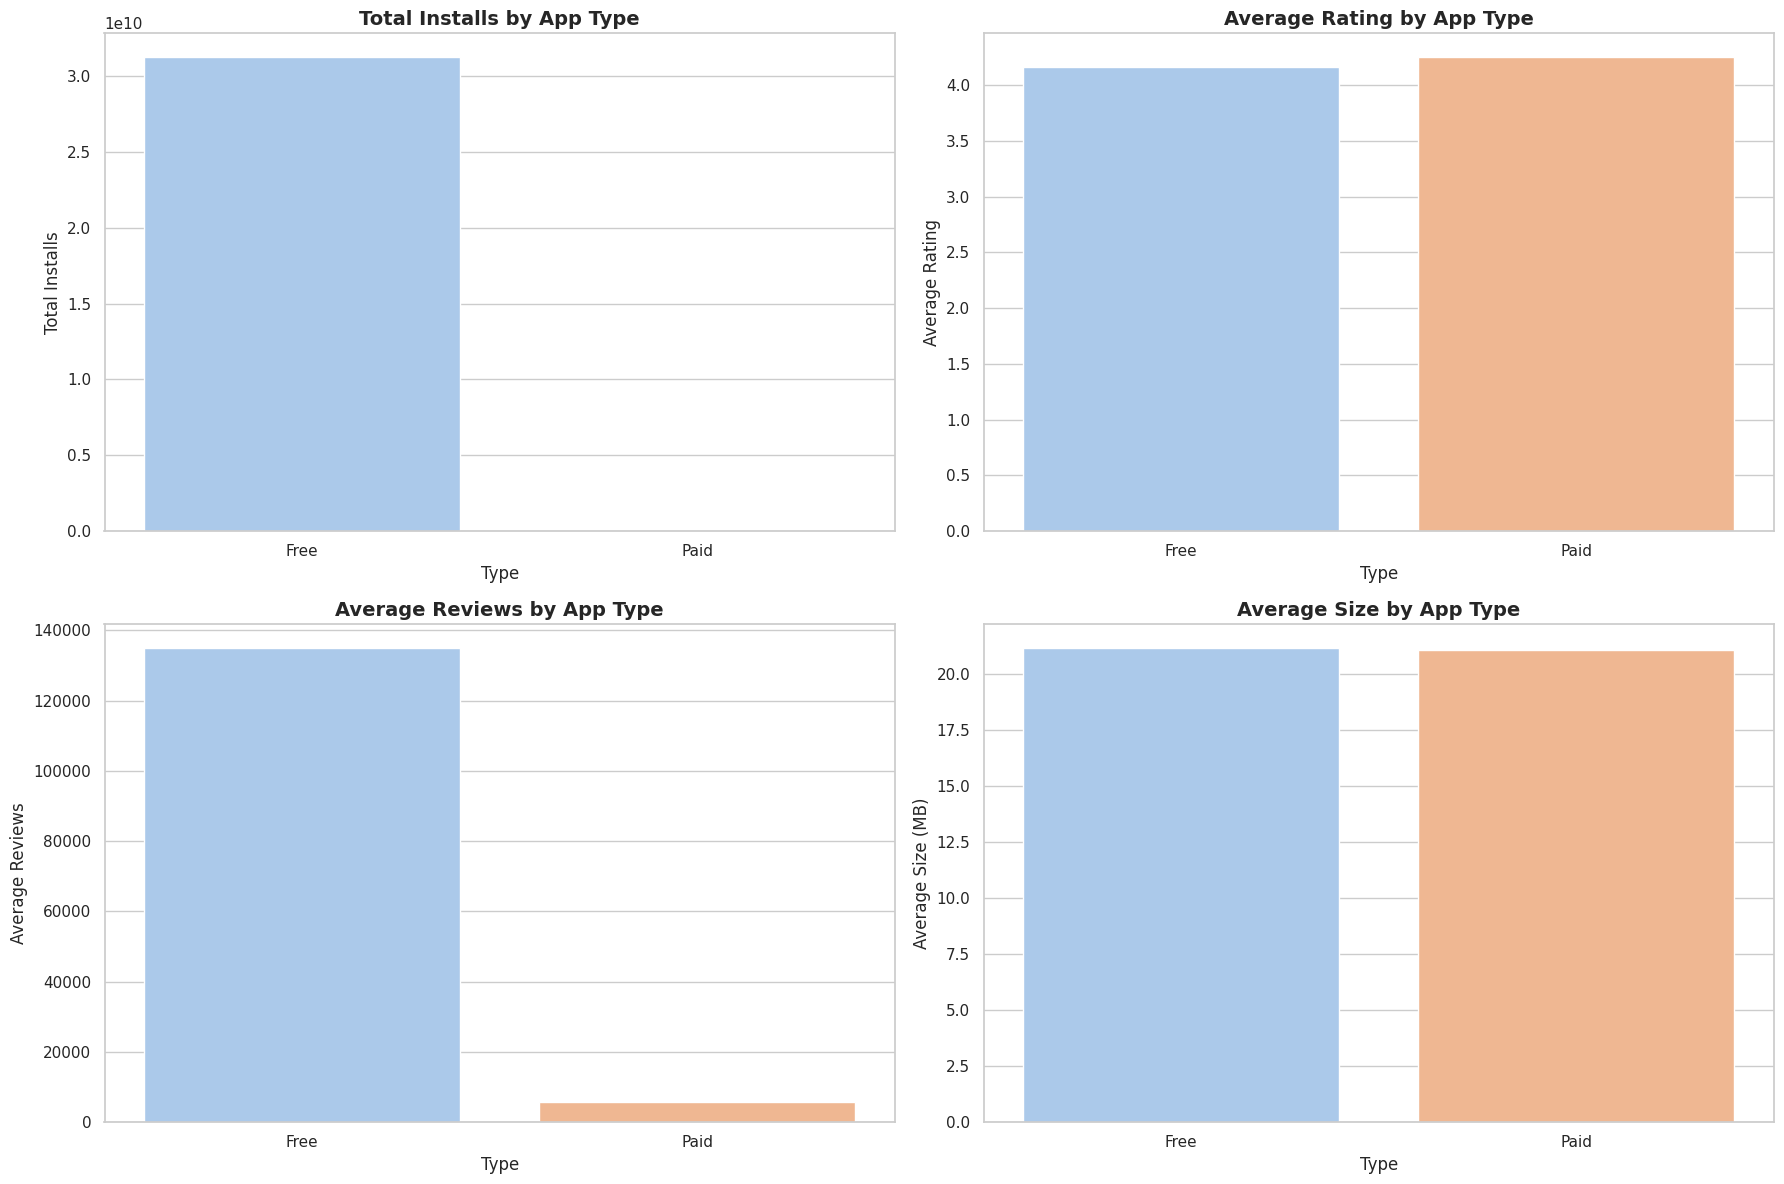

In [209]:

# Assuming 'Installs', 'Reviews', and 'Size_in_MB' columns are already cleaned and in appropriate formats
# Group by 'Type' and calculate required statistics
type_agg = playstore_df.groupby('Type').agg({
    'Installs': 'sum',
    'Rating': 'mean',
    'Reviews': 'mean',
    'Size_in_MB': 'mean'
}).reset_index()

# Rename columns for clarity
type_agg.columns = ['Type', 'Total Installs', 'Average Rating', 'Average Reviews', 'Average Size (MB)']



# Set plot style
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Adjusted figsize for better spacing

# Plot total installs
sns.barplot(x='Type', y='Total Installs', data=type_agg, ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title('Total Installs by App Type', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Total Installs', fontsize=12)

# Plot average Rating
sns.barplot(x='Type', y='Average Rating', data=type_agg, ax=axes[0, 1], palette="pastel")
axes[0, 1].set_title('Average Rating by App Type', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Average Rating', fontsize=12)

# Plot average Reviews
sns.barplot(x='Type', y='Average Reviews', data=type_agg, ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title('Average Reviews by App Type', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Average Reviews', fontsize=12)

# Plot average size
sns.barplot(x='Type', y='Average Size (MB)', data=type_agg, ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title('Average Size by App Type', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Average Size (MB)', fontsize=12)


# Adjust layout
plt.tight_layout()
plt.show()


##### **1. What is/are the insight(s) found from the chart?**

1. As usual, free apps have more downloads than paid apps.
2. It doesn’t matter if the app is paid or free; the average rating is almost the same.
3. Free apps have received more reviews than paid apps.
4. The average size is the same whether the app is paid or free.

#### **Chart - 7 Which size range has the maximum number of installs and the highest average rating?**

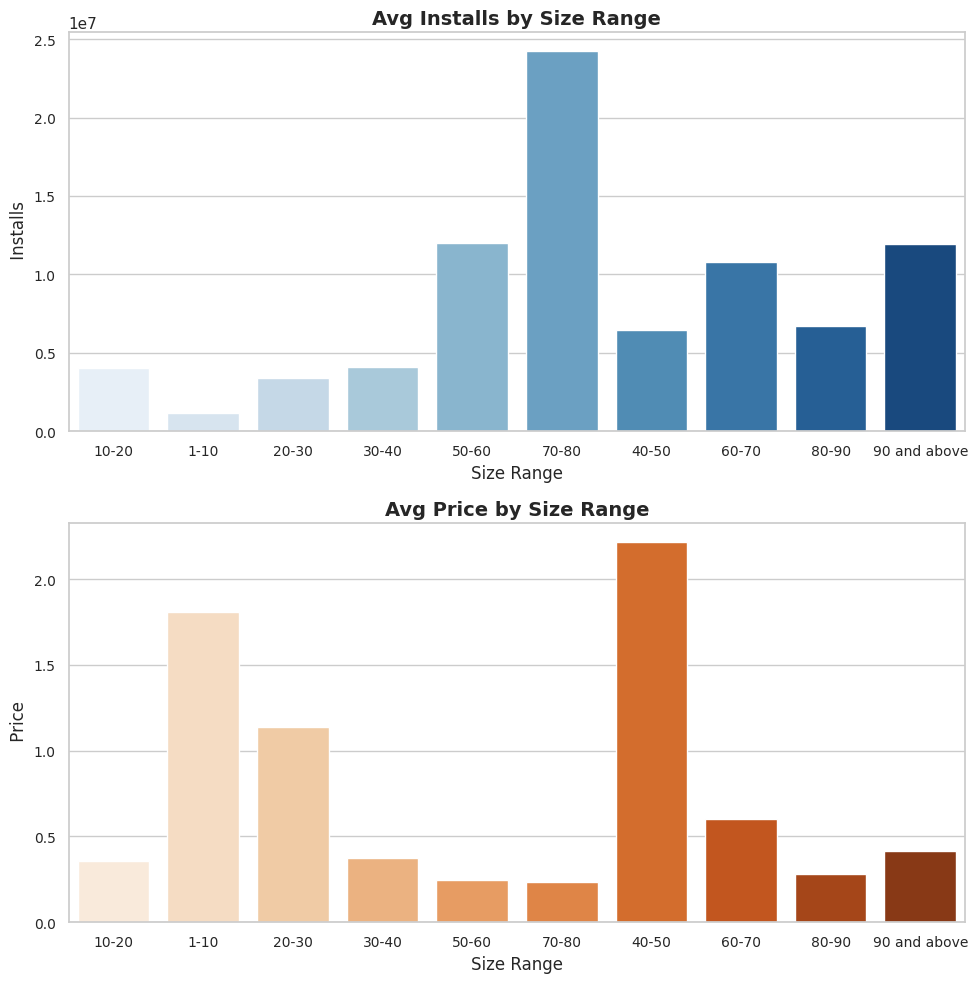

In [210]:
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot 1: Mean Installs by Size Range
sns.barplot(x='Size_range', y='Installs', data=playstore_df, ax=ax[0], estimator='mean', palette='Blues',errorbar=None)
ax[0].set_title('Avg Installs by Size Range', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Size Range', fontsize=12)
ax[0].set_ylabel(' Installs', fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot 2: Mean Price by Size Range
sns.barplot(x='Size_range', y='Price', data=playstore_df, ax=ax[1] ,estimator='mean', palette='Oranges',errorbar=None)
ax[1].set_title('Avg Price by Size Range', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Size Range', fontsize=12)
ax[1].set_ylabel(' Price', fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

##### **1. What is/are the insight(s) found from the chart?**

**Avg Installs by Size Range:**

70-80 MB size range: Apps in this range have the highest average installs, significantly more than other ranges.
50-60 MB, 90 and above, and 60-70 MB: These ranges also show relatively high average installs.
1-10 MB and 10-20 MB: These smaller size ranges have the lowest average installs.
40-50 MB: Despite its higher average price, this size range has relatively fewer installs compared to 70-80 MB.

**Avg Price by Size Range:**

40-50 MB size range: Apps in this range have the highest average price.
1-10 MB, 20-30 MB, and 60-70 MB: These ranges also have higher average prices.
30-40 MB and 70-80 MB: These size ranges have lower average prices despite high installs for 70-80 MB.

##### **2. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**Target the 70-80 MB size range:** This range shows the highest average installs, indicating a sweet spot for user preference. Aim to keep your app within this size range to potentially maximize downloads.
Consider user storage and performance: While larger sizes may be appealing, ensure that your app’s performance and storage efficiency remain optimal.


**Balance price and size:** If you need to price your app higher, consider size ranges like 40-50 MB, which support higher prices. However, ensure that the value offered justifies the cost to avoid deterring potential users.
Competitive pricing for high installs: For apps in the 70-80 MB range, consider a competitive pricing strategy since this size range has high install numbers. A lower price can lead to a larger user base and potentially more revenue through volume.

#### **Chart - 8  What are the top 20 apps having the most installs, the highest price, and the largest size?**

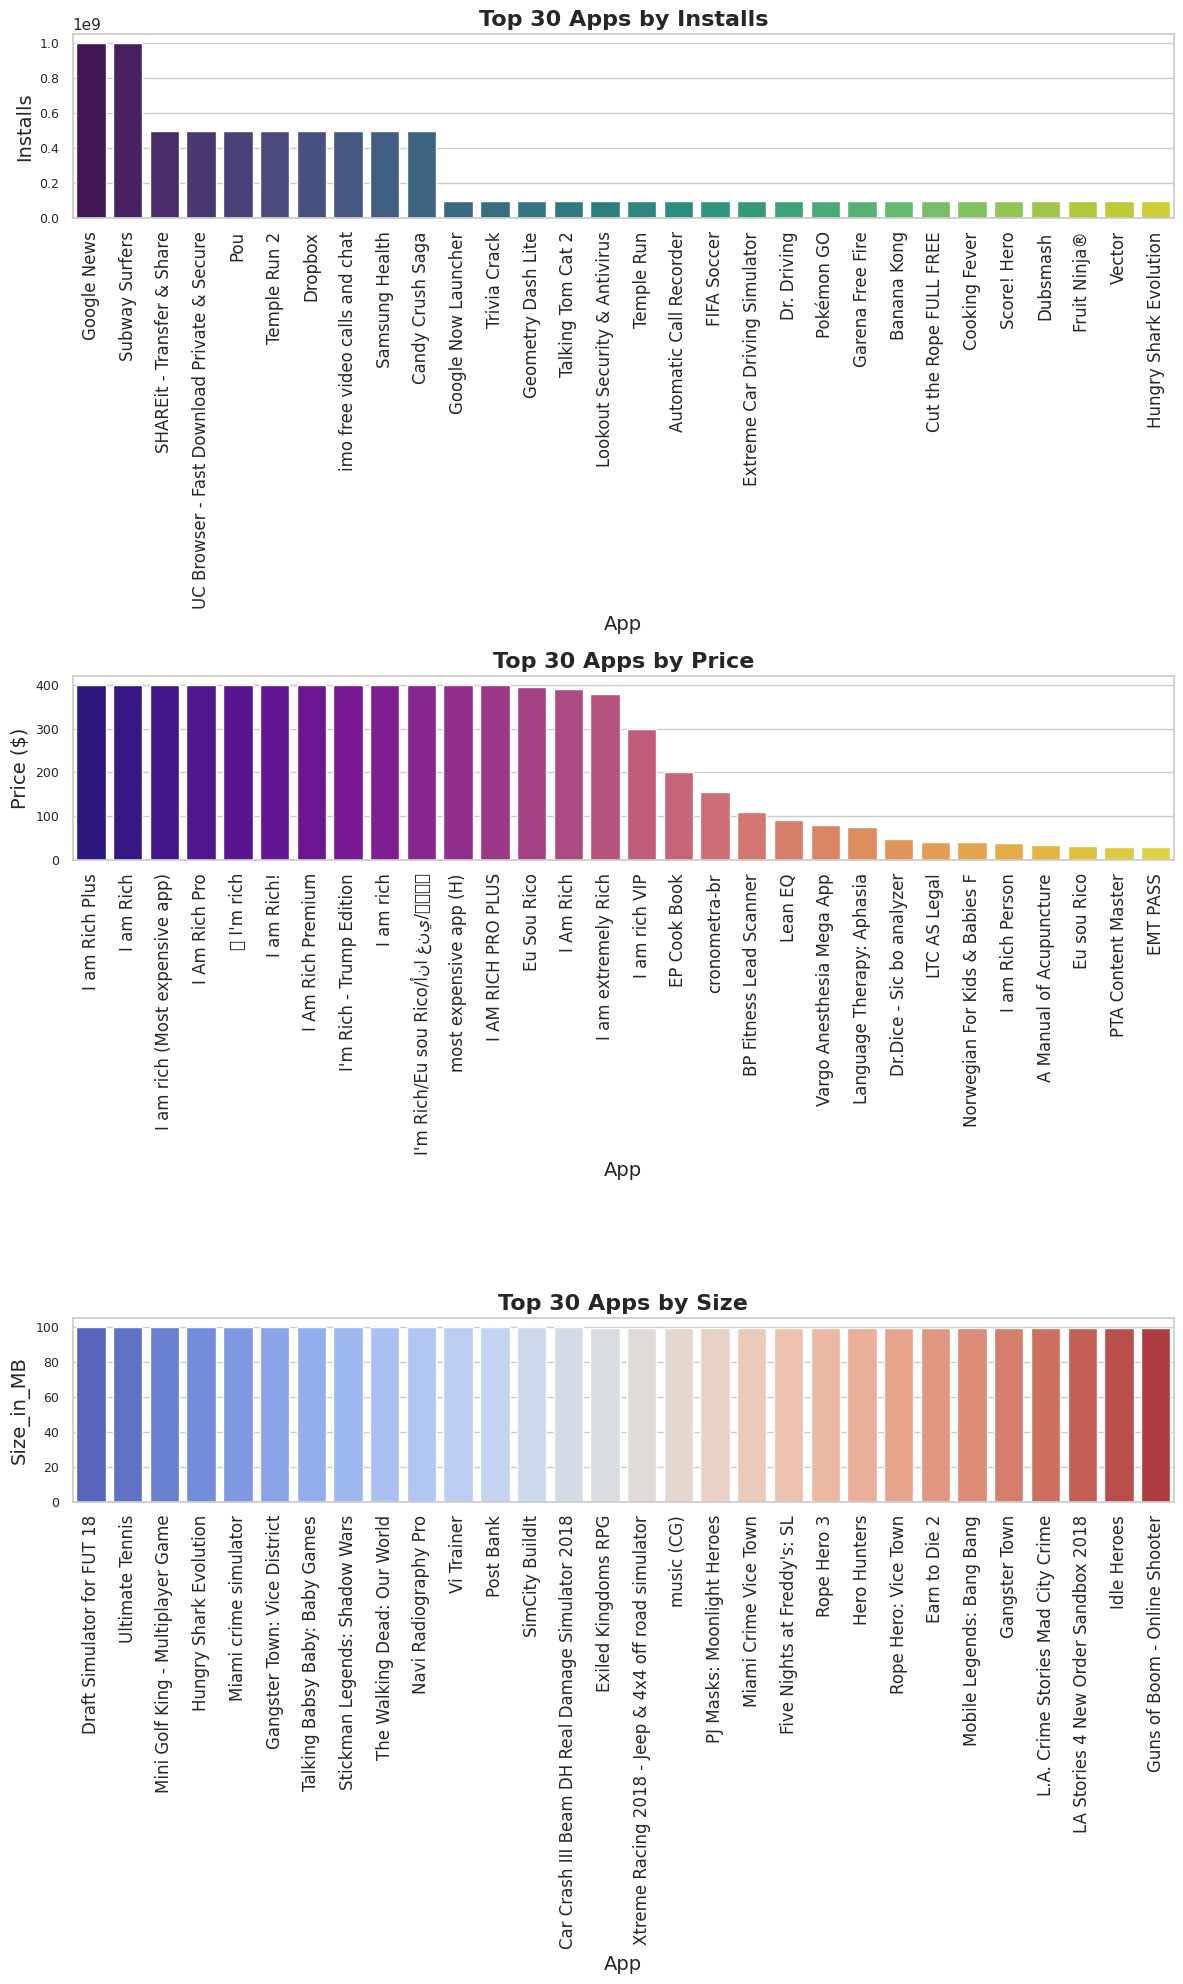

In [211]:


# Sort data for plotting
data1 = playstore_df.sort_values(by='Installs', ascending=False).head(30)
data2 = playstore_df.sort_values(by='Price', ascending=False).head(30)
data3 = playstore_df.sort_values(by='Size_in_MB', ascending=False).head(30)

# Create figure and axes
fig, ax = plt.subplots(3, 1, figsize=(12, 20))

# Plot 1: Top 30 Apps by Installs
sns.barplot(x='App', y='Installs', data=data1, ax=ax[0], palette='viridis')
ax[0].set_title('Top 30 Apps by Installs', fontsize=16, fontweight='bold')
ax[0].set_xlabel('App', fontsize=14)
ax[0].set_ylabel('Installs', fontsize=14)
ax[0].tick_params(axis='x', rotation=90, labelsize=12)
ax[0].tick_params(axis='y', labelsize=9)

# Plot 2: Top 30 Apps by Price
sns.barplot(x='App', y='Price', data=data2, ax=ax[1], palette='plasma')
ax[1].set_title('Top 30 Apps by Price', fontsize=16, fontweight='bold')
ax[1].set_xlabel('App', fontsize=14)
ax[1].set_ylabel('Price ($)', fontsize=14)
ax[1].tick_params(axis='x', rotation=90, labelsize=12)
ax[1].tick_params(axis='y', labelsize=9)

# Plot 3: Top 30 Apps by Rating
sns.barplot(x='App', y='Size_in_MB', data=data3, ax=ax[2], palette='coolwarm')
ax[2].set_title('Top 30 Apps by Size', fontsize=16, fontweight='bold')
ax[2].set_xlabel('App', fontsize=14)
ax[2].set_ylabel('Size_in_MB', fontsize=14)
ax[2].tick_params(axis='x', rotation=90, labelsize=12)
ax[2].tick_params(axis='y', labelsize=9)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


#### **Chart - 9 Which categories of apps generate the most revenue, and which specific apps are the top revenue earners in these categories?**

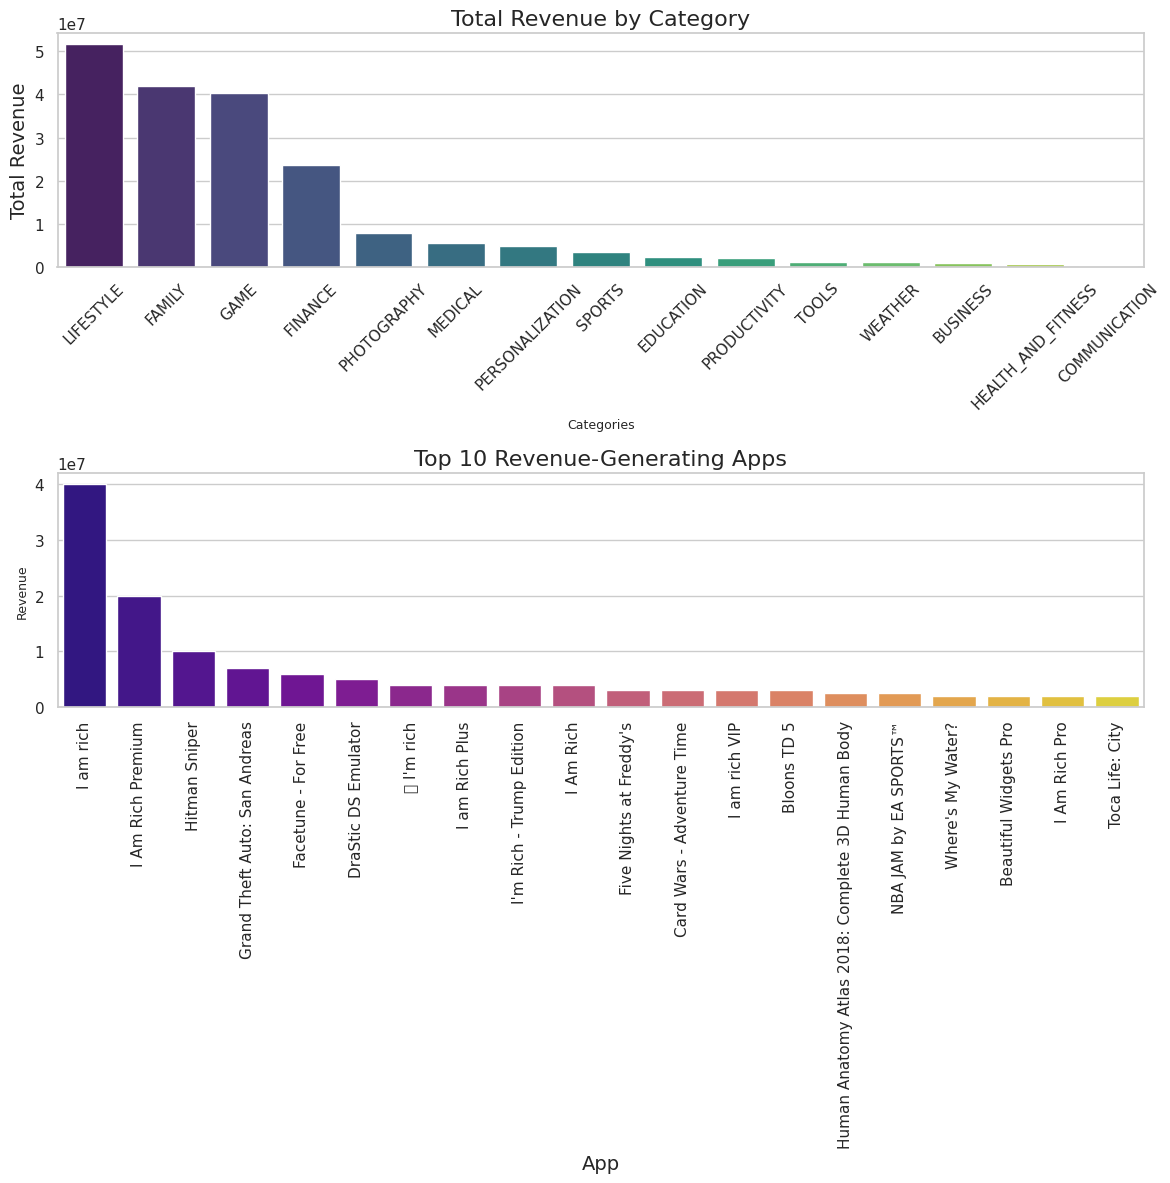

In [212]:
#First I am creating a Revienue column which is nothing but product of number of installs and app_price

playstore_df['Revenue'] = playstore_df['Installs'] * playstore_df['Price']

# Get top 10 revenue-generating apps
data = playstore_df.sort_values(by='Revenue', ascending=False).head(20)
data1=playstore_df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).nlargest(15).reset_index()

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot total revenue by category
sns.barplot(
    data=data1,
    x='Category',
    y='Revenue',
    errorbar=None,
    ax=ax[0],
    palette='viridis'
)
ax[0].set_title('Total Revenue by Category', fontsize=16)
ax[0].set_xlabel('Categories', fontsize=9)
ax[0].set_ylabel('Total Revenue', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)

# Plot top 10 revenue-generating apps
sns.barplot(
    data=data,
    x='App',
    y='Revenue',
    estimator='sum',
    errorbar=None,
    ax=ax[1],
    palette='plasma'
)
ax[1].set_title('Top 10 Revenue-Generating Apps', fontsize=16)
ax[1].set_xlabel('App', fontsize=14)
ax[1].set_ylabel('Revenue', fontsize=9)
ax[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### **1. What is/are the insight(s) found from the chart?**

**Revenue by Category:**

The Lifestyle category generates the highest total revenue, followed by Family and Game categories.
Categories like Finance, Photography, and Medical also show significant revenue, although much less than the top three.
Other categories such as Health and Fitness, Communication, and Business generate the least revenue.

**Top 10 Revenue-Generating Apps:**

The app "I am Rich" stands out with a significantly higher revenue than any other app.
The top revenue-generating apps are dominated by high-priced, niche apps (like "I Am Rich" series) and popular games (like "Hitman Sniper" and "Grand Theft Auto: San Andreas").
Some top apps are premium or specialized apps (like "FaceTune - For Free" and "Drastic DS Emulator").

##### **2. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**Focus on High-Revenue Categories:**

Developers should consider creating apps in high-revenue categories such as Lifestyle, Family, and Game.
These categories have proven to generate substantial revenue and may offer more opportunities for new entrants.

#### **Chart - 10 How does the number of apps vary across different categories over time?**

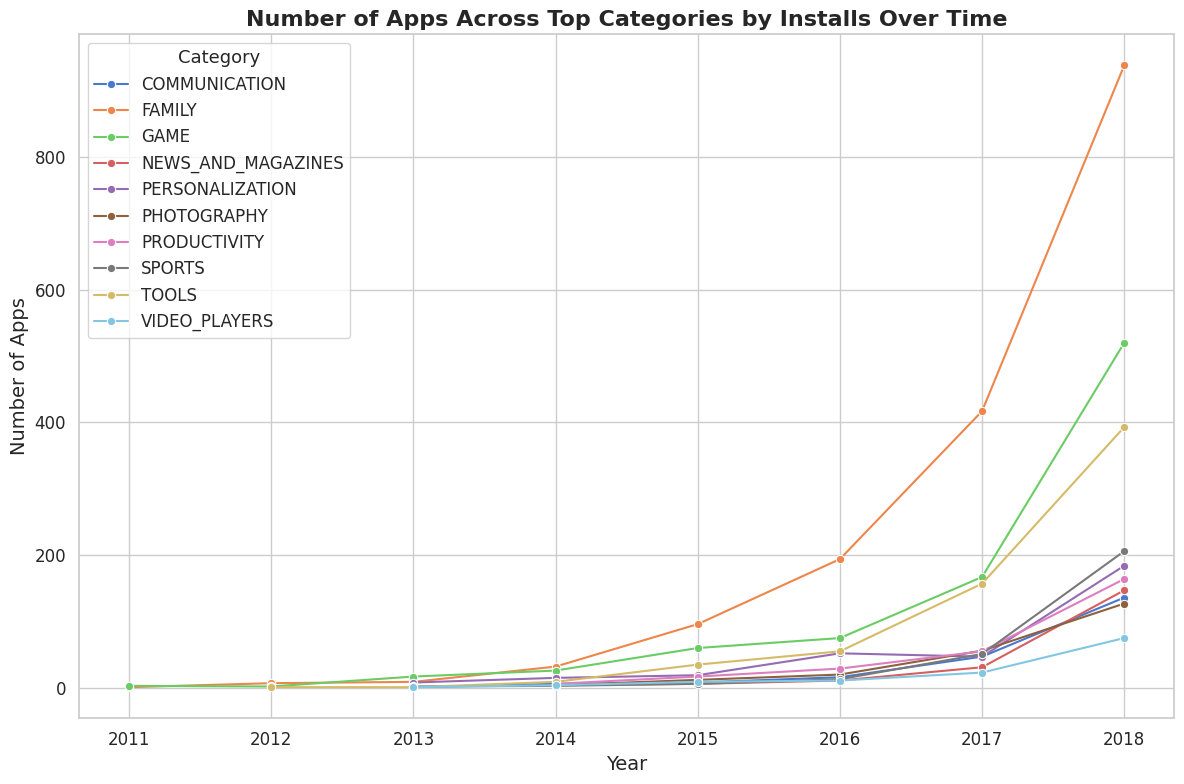

In [213]:

#First I am creating a new column called Year_of_update by fetching Year portion from Last Updated column
playstore_df['Year_of_update']=playstore_df['Last Updated'].dt.year

# Calculate total installs per category
category_installs = playstore_df.groupby('Category')['Installs'].sum()

# Select top categories by installs
top_categories = category_installs.nlargest(10).index  # Selecting top 15 categories by installs

# Filter data to include only top categories
top_categories_data = playstore_df[playstore_df['Category'].isin(top_categories)]

# Group by 'Category' and 'Year_of_update', count unique apps
apps_per_category_per_year = top_categories_data.groupby(['Category', 'Year_of_update'])['App'].nunique().reset_index()

# Set style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year_of_update', y='App', hue='Category', data=apps_per_category_per_year, marker='o', palette='muted')
plt.title('Number of Apps Across Top Categories by Installs Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', fontsize=12, title_fontsize='13')
plt.tight_layout()

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

lineplots are best to show trends over years.

##### **2. What is/are the insight(s) found from the chart?**

**Dominant Categories**:

The "Family" category has seen the most significant increase in the number of apps, especially after 2016, indicating a high demand and popularity in this category.
The "Game" category also shows substantial growth, making it one of the leading categories alongside "Family".

Other categories like "Tools", "Productivity", and "Communication" have shown consistent growth, though at a slower rate compared to "Family" and "Game".

**Steady Growth Across Most Categories:**

Most categories, including "News and Magazines", "Personalization", "Photography", "Sports", and "Video Players", have shown steady growth over the years.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**Focus on Popular Categories:**

Given the rapid growth in the "Family" and "Game" categories, consider developing apps that cater to these segments. These categories are currently in high demand, providing a potentially large user base.

**Innovate in High Growth Areas:**

While popular categories are appealing, the competition is intense. Focus on innovative features and unique value propositions to stand out in crowded categories like "Family" and "Game".

**Diversify Offerings:**

Explore opportunities in steadily growing categories such as "Tools", "Productivity", and "Communication". These areas show consistent growth and might offer less competitive but still lucrative opportunities.

#### **Chart - 11 How have app sizes and prices changed over time?**

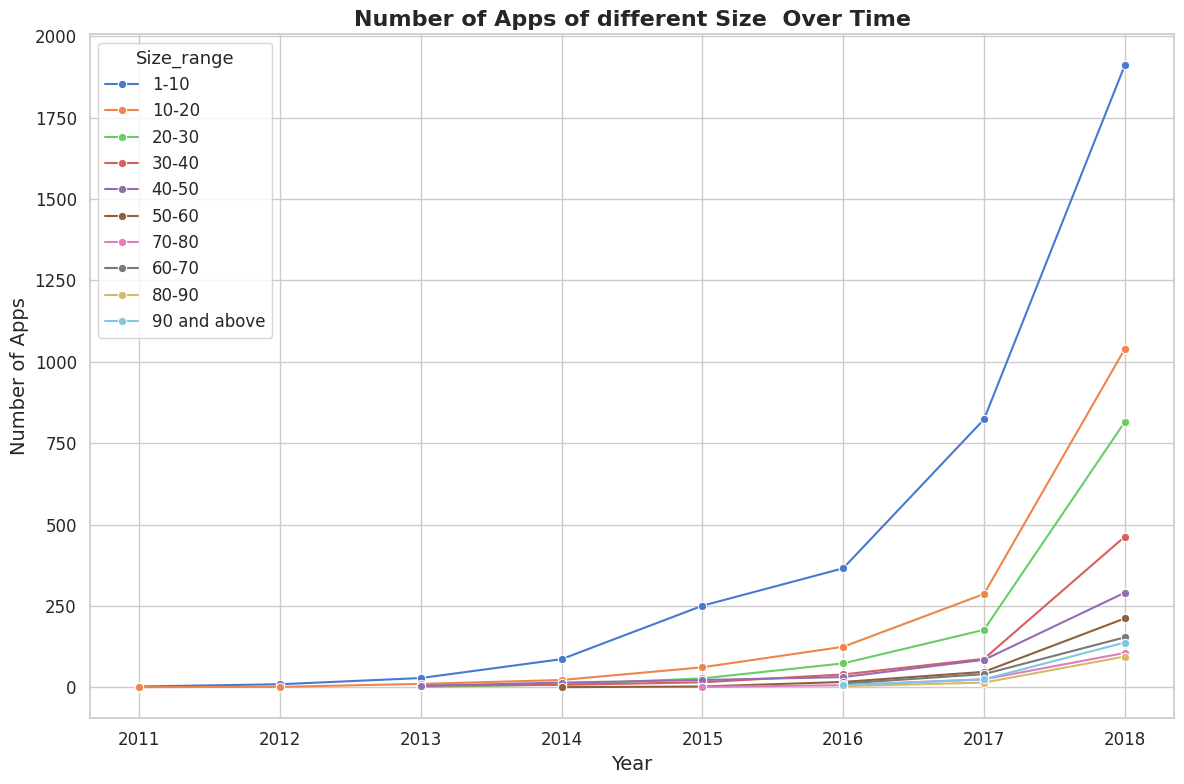

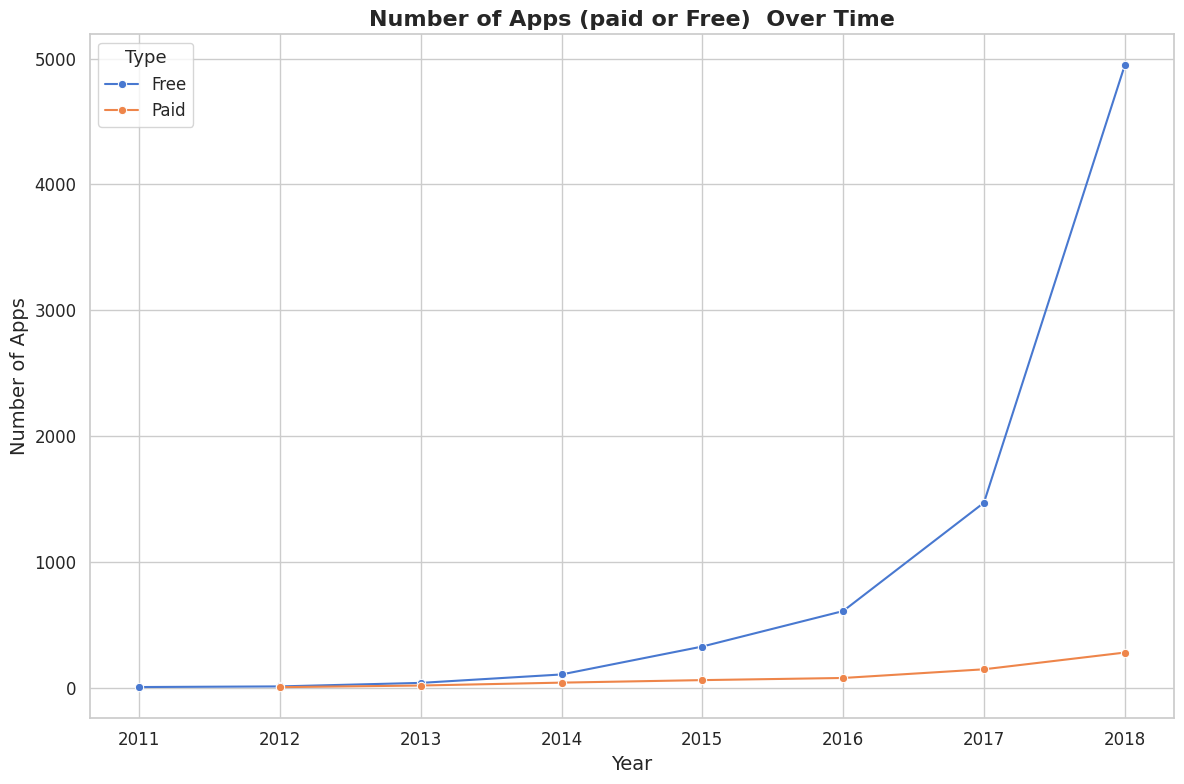

In [214]:
data1=playstore_df.groupby(['Year_of_update','Size_range'])['App'].nunique().reset_index()

data2=playstore_df.groupby(['Year_of_update','Type'])['App'].nunique().reset_index()

plt.figure(figsize=(12, 8))

sns.lineplot(x='Year_of_update', y='App', hue='Size_range', data=data1, marker='o', palette='muted')
plt.title('Number of Apps of different Size  Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Size_range', fontsize=12, title_fontsize='13')
plt.tight_layout()

plt.figure(figsize=(12, 8))

sns.lineplot(x='Year_of_update', y='App', hue='Type', data=data2, marker='o', palette='muted')
plt.title('Number of Apps (paid or Free)  Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Type', fontsize=12, title_fontsize='13')
plt.tight_layout()
plt.show()

##### **1. What is/are the insight(s) found from the chart?**

**1st plot**

**Exponential Growth in App Numbers:**

There has been an exponential growth in the number of apps across all size categories, especially after 2016.
The smallest size category (1-10 MB) has seen the most significant increase, peaking sharply in 2018.

**Size Distribution:**

While smaller apps (1-10 MB and 10-20 MB) dominate in terms of numbers, larger apps (20 MB and above) have also seen consistent growth, indicating that users and markets are increasingly accommodating larger apps.

**2nd plot**

Both kind of apps whether it is free or paid apps are showing consistent growth over the years

##### **2. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.


- Given the prevalence and growth of smaller apps, focus on optimizing your app’s size without compromising functionality. This can make your app more appealing, especially in markets where data usage and storage are concerns.
Target Multiple Size Ranges:

- Consider developing a range of apps or different versions of your app that cater to different size preferences. This can help capture a broader audience.

#### **Chart - 12  How does content rating affect the number of installs and price?**

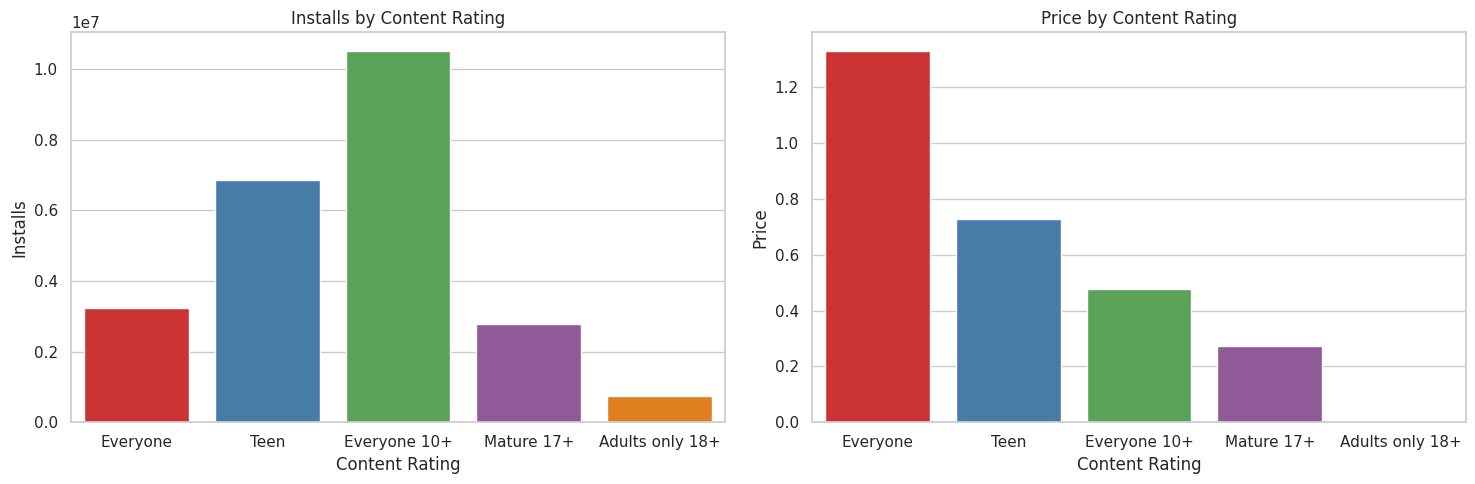

In [215]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Installs vs Content Rating
sns.barplot(data=playstore_df, x='Content Rating', y='Installs', ax=ax[0], palette='Set1',errorbar=None)
ax[0].set_title('Installs by Content Rating')
ax[0].set_xlabel('Content Rating')
ax[0].set_ylabel('Installs')

# Plot for Price vs Content Rating
sns.barplot(data=playstore_df, x='Content Rating', y='Price', ax=ax[1], palette='Set1',errorbar=None)
ax[1].set_title('Price by Content Rating')
ax[1].set_xlabel('Content Rating')
ax[1].set_ylabel('Price')

plt.tight_layout()
plt.show()


##### **1. What is/are the insight(s) found from the chart?**

**Installs by Content Rating:**

Everyone 10+ rated apps have the highest number of installs, followed by Teen rated apps.
Everyone rated apps have fewer installs compared to Teen and Everyone 10+.
Mature 17+ and Adults only 18+ rated apps have the lowest number of installs, with Adults only 18+ having the least.

**Price by Content Rating:**

Everyone rated apps are the most expensive, followed by Teen rated apps.
Everyone 10+ rated apps are moderately priced.
Mature 17+ and Adults only 18+ rated apps are cheaper, with Adults only 18+ having the lowest prices.

##### **1. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**Target Audience Consideration:**

If the goal is to maximize installs, focusing on apps with an Everyone 10+ or Teen rating could be beneficial since these categories show higher install rates.
Consider developing apps that appeal to a broader audience, as indicated by the higher installs in the Everyone 10+ category.

**Pricing Strategy:**

While Everyone rated apps are priced the highest, their install rates are lower compared to Everyone 10+ and Teen apps. Consider a competitive pricing strategy to attract more users while maintaining reasonable profitability.
For Mature 17+ and Adults only 18+ rated apps, the lower prices might be indicative of lower demand or market willingness to pay. If targeting these categories, consider additional value propositions or premium features to justify higher pricing.


#### **Chart - 13 - Correlation Heatmap**

In [216]:
#fetching numerical column
a=[i for i in playstore_df.columns if playstore_df[i].dtype!='object']

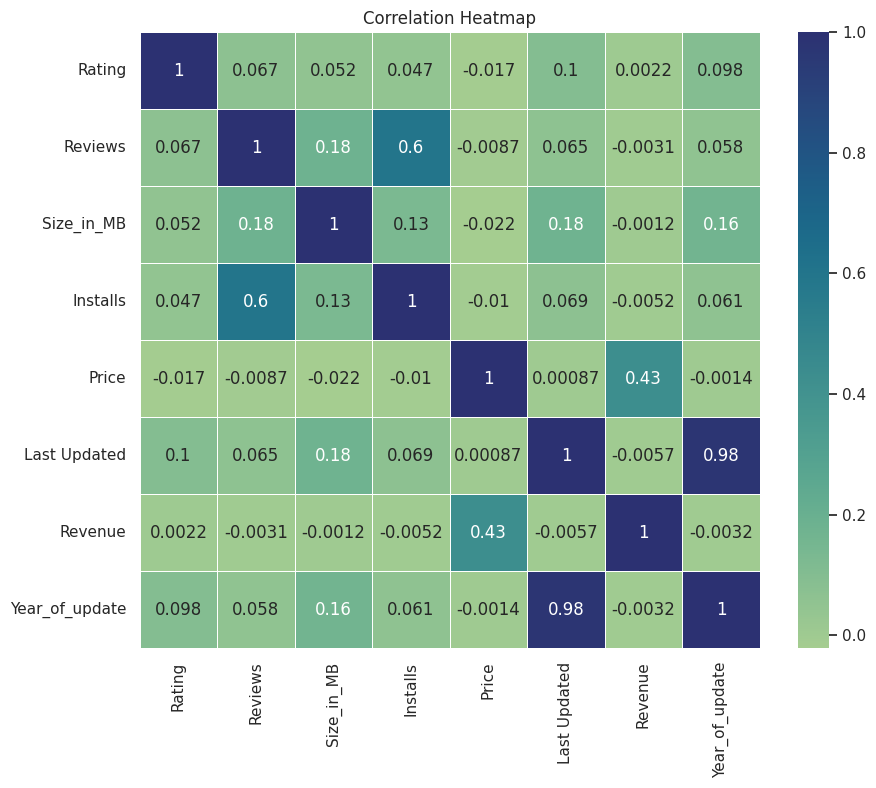

In [217]:
plt.figure(figsize=(10, 8))
sns.heatmap(playstore_df[a].corr(), annot=True, cmap='crest', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

##### **1. Why did you pick the specific chart?**

A heatmap is an excellent way to visualize correlations between numerical columns.

##### **2. What is/are the insight(s) found from the chart?**

1. **Reviews and Installs**: There is a moderate positive correlation (0.6) between the number of reviews and the number of installs. This indicates that apps with more installs tend to receive more reviews.

2. **Year_of_update and Last Updated**: There is a very high positive correlation (0.98) between these two columns, which makes sense as they likely represent similar time-based information.

3. **Size_in_MB and Reviews:** There is a low positive correlation (0.18) between the size of the app and the number of reviews, suggesting that larger apps might slightly tend to have more reviews.

4. **Size_in_MB and Last Updated:** There is a low positive correlation (0.18) between the size of the app and the date of the last update, which might indicate that newer apps tend to be larger.

5. **Rating and Year_of_update:** There is a low positive correlation (0.098) between the app rating and the year of the update.

#### **Chart - 14 - Pair Plot**

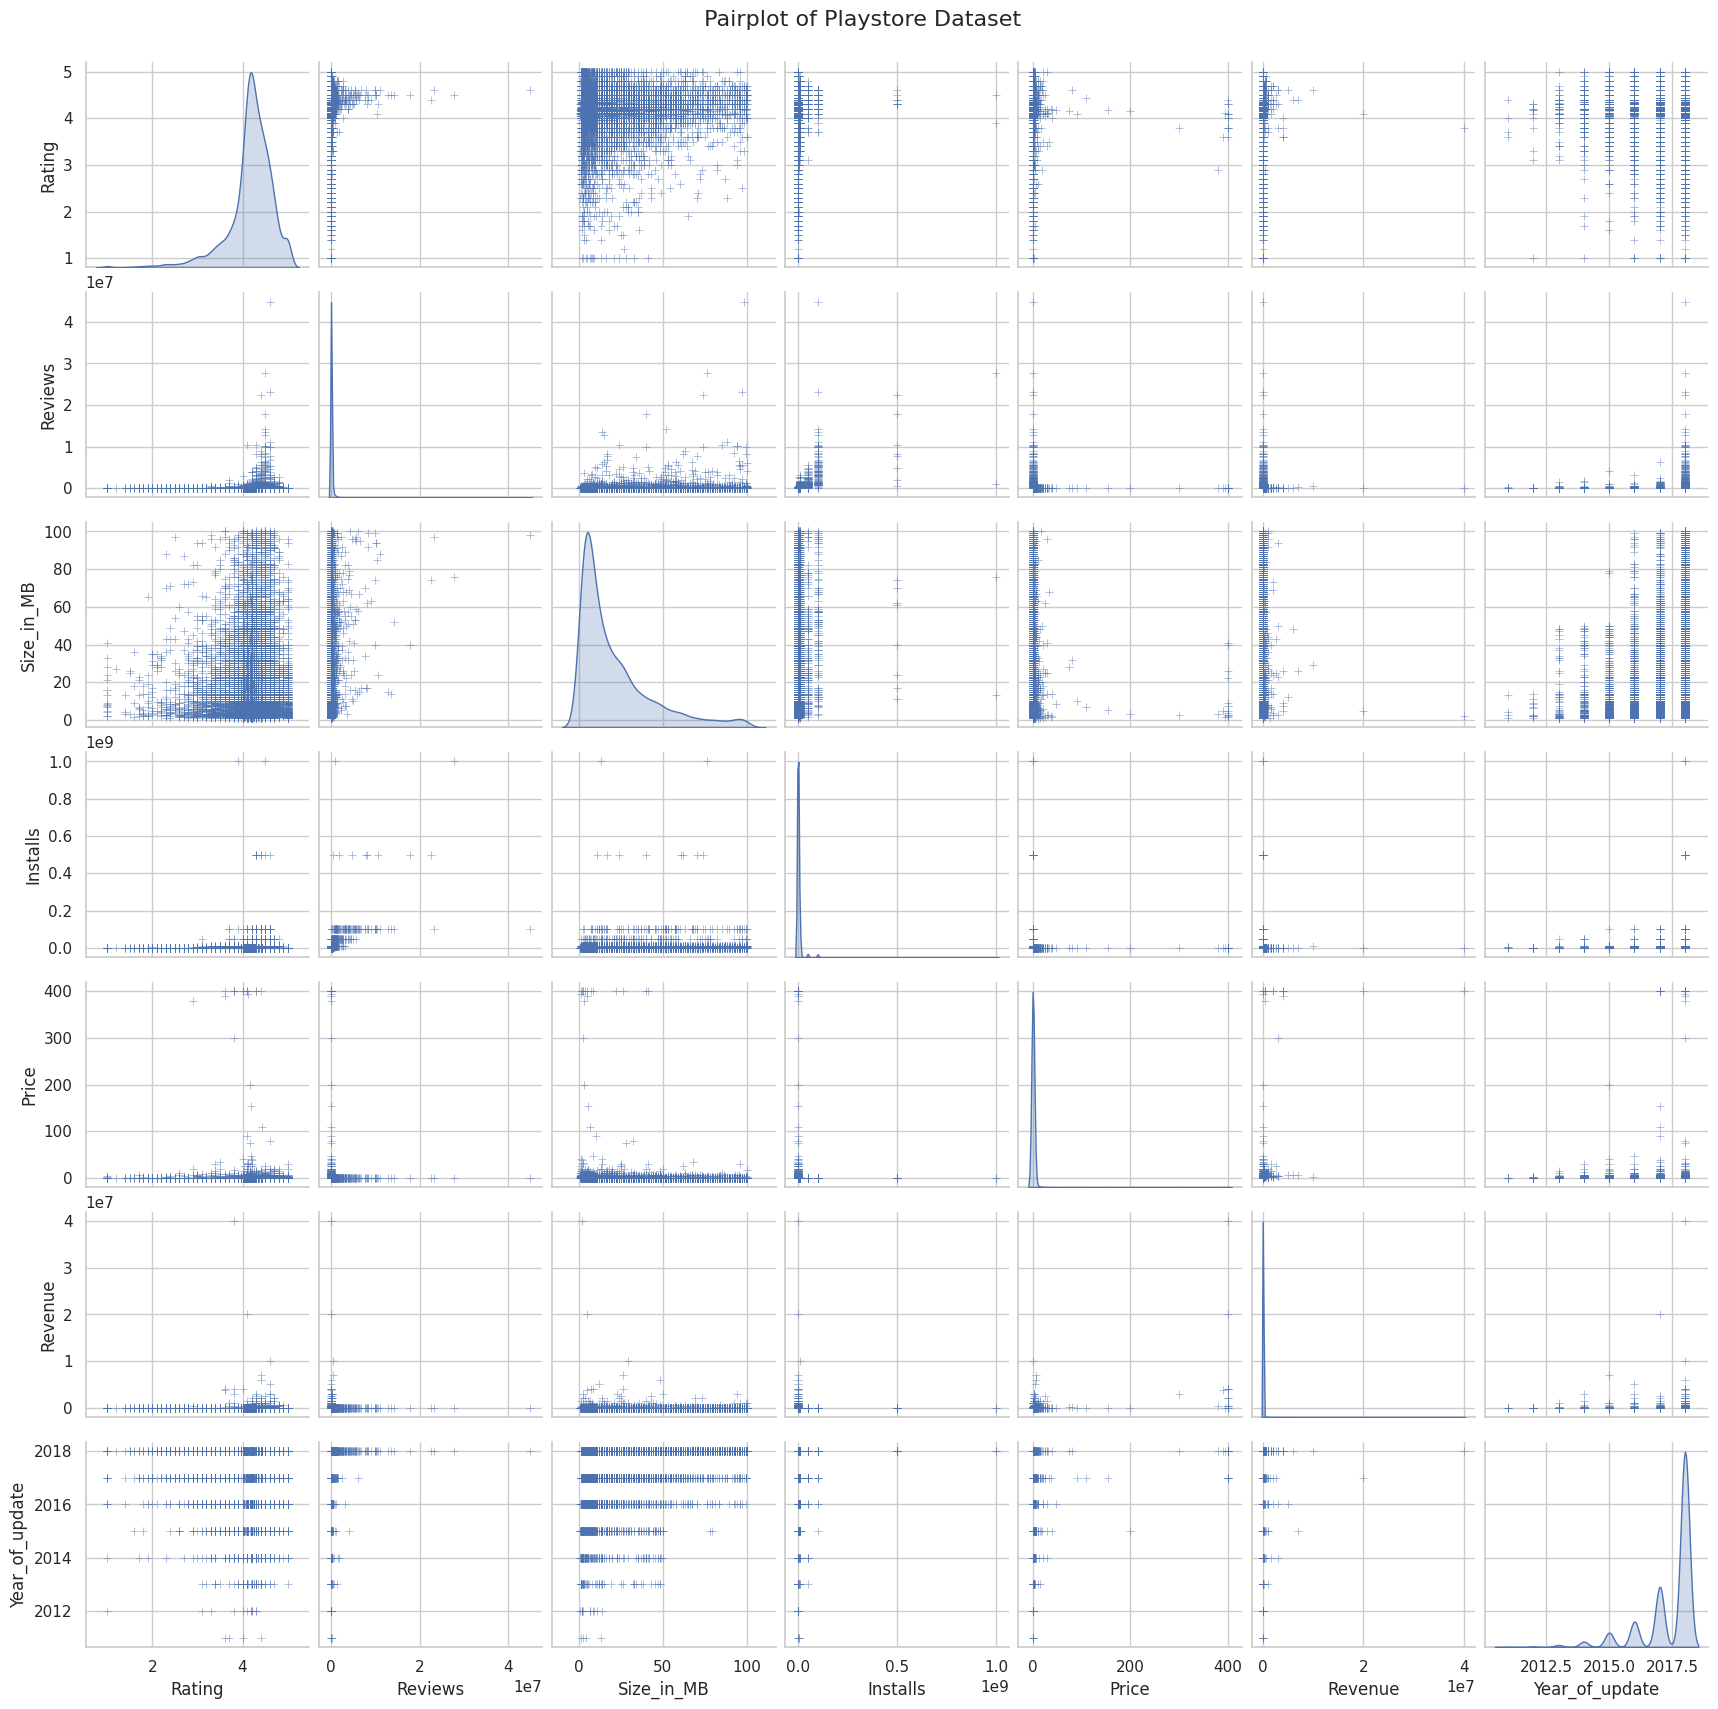

In [218]:

sns.set(style="whitegrid")


pairplot = sns.pairplot(playstore_df,
                        diag_kind="kde",
                        markers="+",
                        plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'},
                        palette="viridis")


# Add better spacing
pairplot.fig.subplots_adjust(top=0.95)
pairplot.fig.suptitle(' Pairplot of Playstore Dataset', fontsize=16)

# Show the plot
plt.show()


##### **1. Why did you pick the specific chart?**

A pair plot is best to visualize relationships between pairs of variables and to understand the distribution of single variables in a dataset.

##### **2. What is/are the insight(s) found from the chart?**

1. **Rating Distribution:**

Most apps have ratings clustered around 4 to 5, indicating a positive overall user experience.

2. **Reviews vs. Installs:**

There is a positive correlation between the number of reviews and the number of installs. Apps with more installs tend to have more reviews, which is expected as a higher user base often leads to more feedback.

3. **Size vs. Installs:**

There appears to be a weak positive correlation between the size of the app and the number of installs, with some larger apps having higher install numbers. However, this trend is not very strong.

4. **Price vs. Installs:**

Free apps (price = 0) dominate the install numbers. Paid apps have significantly fewer installs, indicating user preference for free applications.
Year of Update:

Most apps in the dataset have been updated in recent years (2017 and 2018), suggesting that actively maintained apps are more common on the Playstore.

5. **Size vs. Rating:**

There is no strong correlation between app size and rating. Both small and large apps can have high or low ratings.

####**Working with User_df**

####**Unique Variable discription**



- **Translated_Review:** This column contains user reviews that have been translated into a common language to facilitate sentiment analysis and comparison.

- **Sentiment:** This column indicates the overall sentiment of the review. It typically has categorical values such as "Positive," "Negative," or "Neutral," representing the general tone of the user's feedback.

- **Sentiment_Polarity:** This column contains numerical values that quantify the sentiment polarity of the review. The values typically range from -1 to 1, where: -1 indicates very negative sentiment, 0 indicates neutral sentiment
and 1 indicates very positive sentiment.

- **Sentiment_Subjectivity:** This column contains numerical values that quantify the subjectivity of the review. The values typically range from 0 to 1, where: 0 indicates a completely objective review (based on facts) and 1 indicates a completely subjective review (based on personal opinions)

##### **merging playstore_df and user_df datasets**

In [219]:
merge_df=playstore_df.merge(user_df,how='inner')

In [220]:
print("number of rows ", merge_df.shape[0],"number of columns ",merge_df.shape[1])

number of rows  40790 number of columns  18


#####**checking  And handling null values**

In [221]:
#checking null values
merge_df.isnull().sum()

App                           0
Category                      0
Rating                        0
Rating_type                   0
Reviews                       0
Size_in_MB                    0
Size_range                    0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Last Updated                  0
Revenue                       0
Year_of_update                0
Translated_Review         16956
Sentiment                 16953
Sentiment_Polarity        16953
Sentiment_Subjectivity    16953
dtype: int64

In [222]:
#removing null values
merge_df.dropna(inplace=True)

In [223]:
#checking
merge_df.isnull().sum()

App                       0
Category                  0
Rating                    0
Rating_type               0
Reviews                   0
Size_in_MB                0
Size_range                0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Last Updated              0
Revenue                   0
Year_of_update            0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

######**Checking  and handling duplicates**

In [224]:
#checking duplicates
merge_df.duplicated().sum()

4752

In [225]:
#drop_duplicates
merge_df.drop_duplicates(inplace=True)

#### **Chart - 15 - What is the distribution of Sentiment, Sentiment Polarity, and Sentiment Subjectivity?**

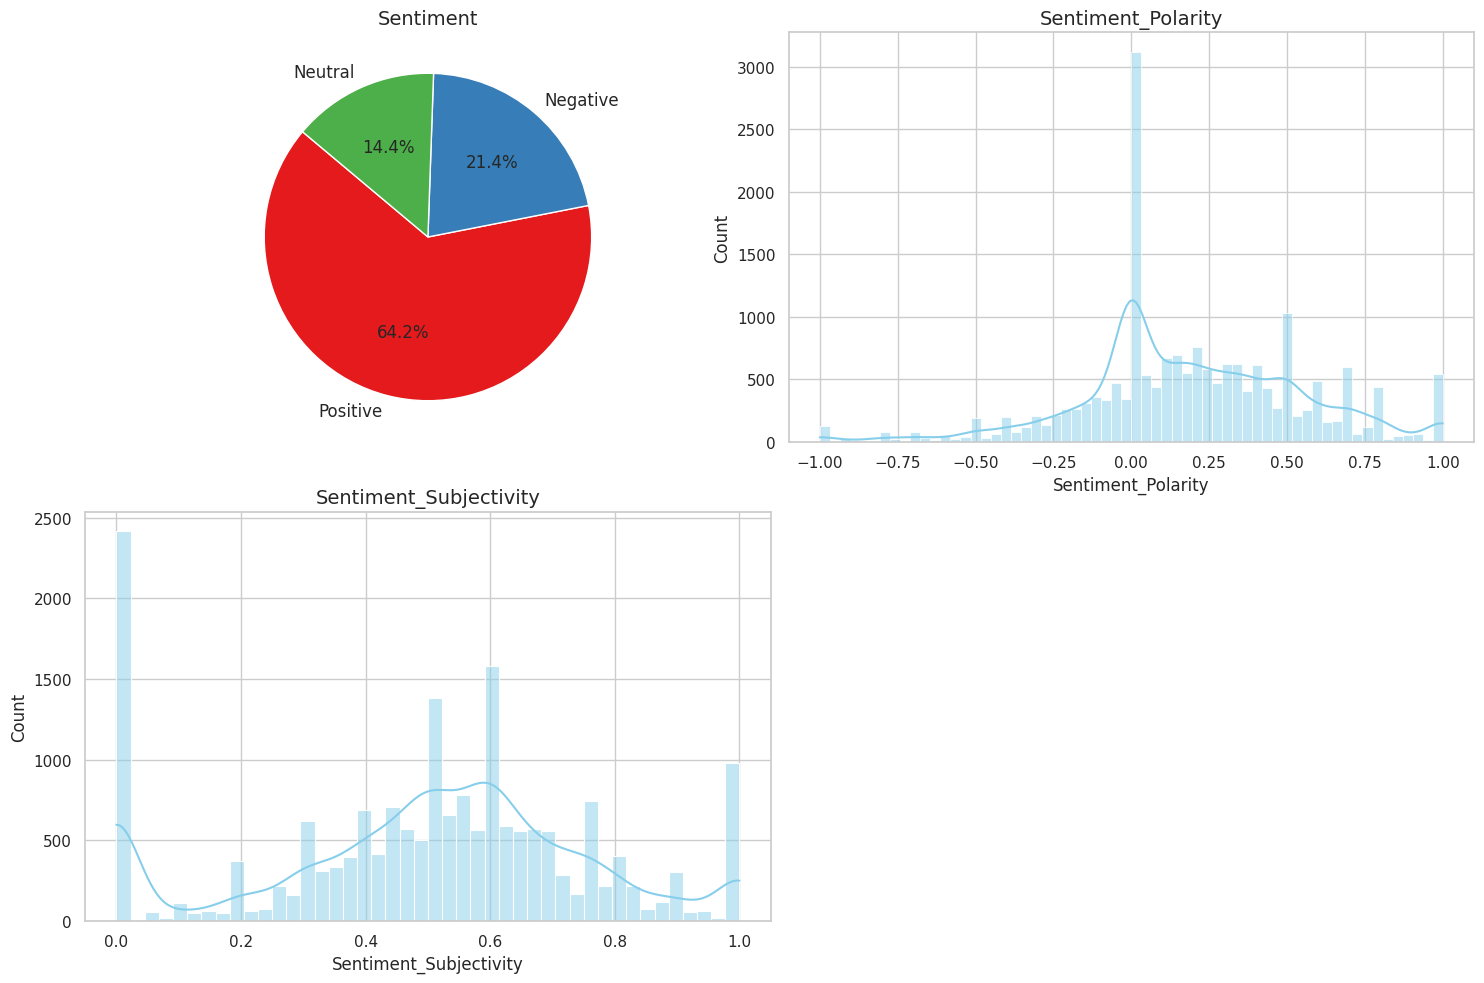

In [226]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 12})  # Update font size for better readability

# Determine the number of features to plot
num_features = len(merge_df.iloc[:, 15:].columns)
num_rows = (num_features // 2) + (num_features % 2)

fig, ax = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
ax = ax.flatten()

for i, col in enumerate(merge_df.iloc[:, 15:].columns):
    if merge_df[col].dtype == 'object':
        wedges, texts, autotexts = ax[i].pie(
            merge_df[col].value_counts(),
            labels=merge_df[col].value_counts().index,
            autopct='%0.1f%%',
            startangle=140,
            colors=sns.color_palette('Set1')[0:len(merge_df[col].value_counts())]
        )
        for text in texts:
            text.set_fontsize(12)
        for autotext in autotexts:
            autotext.set_fontsize(12)
        ax[i].set_title(col, fontsize=14)
    else:
        sns.histplot(data=merge_df, x=col, kde=True, ax=ax[i], color='skyblue')
        ax[i].set_title(col, fontsize=14)
        ax[i].set_xlabel(col, fontsize=12)
        ax[i].set_ylabel('Count', fontsize=12)
        ax[i].grid(True)

# Hide any remaining empty subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

##### **1. What is/are the insight(s) found from the chart?**

**Sentiment Distribution (Pie Chart):**

Positive Sentiment: 64.2%
Neutral Sentiment: 14.4%
Negative Sentiment: 21.4%
The majority of the sentiments are positive, which is a good sign as it indicates overall satisfaction or approval from users. However, there is a notable proportion of negative sentiments that should be addressed.

**Sentiment Polarity (Histogram with Density Plot):**

The histogram shows the distribution of sentiment polarity values ranging from -1 (most negative) to 1 (most positive).
There is a significant peak around the neutral sentiment (polarity ~0), indicating many comments are neutral or balanced in their sentiment.
There are more positive sentiment values (polarity > 0) compared to negative ones (polarity < 0), aligning with the pie chart's insight.

**Sentiment Subjectivity (Histogram with Density Plot):**

The histogram indicates the distribution of subjectivity values ranging from 0 (most objective) to 1 (most subjective).
A notable peak is seen at 0, indicating a large number of objective comments.
There is a broad distribution of subjective sentiments, with many values clustering around the mid-range (0.5 to 0.6), suggesting a balanced mix of objective and subjective opinions.

##### **2. Will the gained insights help creating a positive business impact?**


**Focus on High Polarity Categories:**

If you're looking to develop an app in a category where users generally express positive sentiments, consider targeting "FOOD_AND_DRINK," "HEALTH_AND_FITNESS," or "EVENTS." These categories have the highest average sentiment polarity.

**Improve User Experience in Low Polarity Categories:**

For developers with apps in "MAPS_AND_NAVIGATION," "NEWS_AND_MAGAZINES," or "GAME," focus on identifying pain points that might be causing lower sentiment scores. Enhancing usability, addressing common complaints, and adding engaging features could help improve user sentiment.

#### **Chart - 16 - What is the average Sentiment Polarity and Sentiment Subjectivity for each category?**


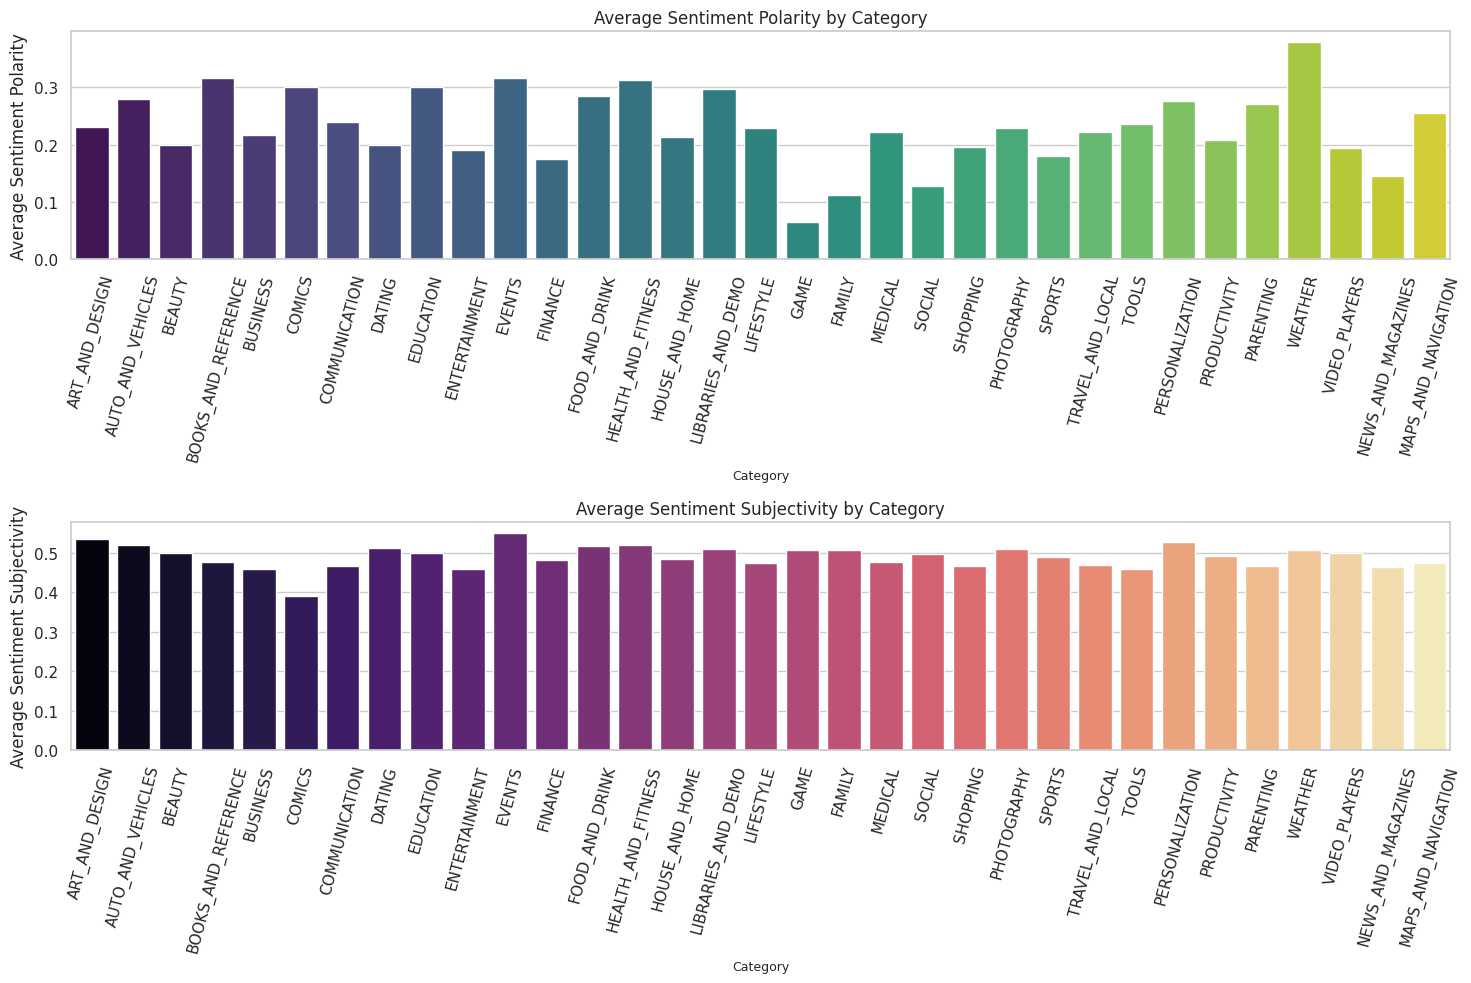

In [227]:
sns.set_style('whitegrid')

# Create the subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# First bar plot: Category vs Sentiment Polarity
sns.barplot(data=merge_df, x='Category', y='Sentiment_Polarity', estimator='mean', ax=ax[0], palette='viridis',errorbar=None)
ax[0].set_title('Average Sentiment Polarity by Category')
ax[0].set_xlabel('Category',fontsize=9)
ax[0].set_ylabel('Average Sentiment Polarity')
ax[0].tick_params(axis='x', rotation=75)

# Second bar plot: Category vs Sentiment Subjectivity
sns.barplot(data=merge_df, x='Category', y='Sentiment_Subjectivity', estimator='mean', ax=ax[1], palette='magma',errorbar=None)
ax[1].set_title('Average Sentiment Subjectivity by Category')
ax[1].set_xlabel('Category',fontsize=9)
ax[1].set_ylabel('Average Sentiment Subjectivity')
ax[1].tick_params(axis='x', rotation=75)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

##### **1. What is/are the insight(s) found from the chart?**

1. **Average Sentiment Polarity by Category**

- **Highest Polarity:**
Categories like "FOOD_AND_DRINK," "HEALTH_AND_FITNESS," "EVENTS," and "HOUSE_AND_HOME" show the highest average sentiment polarity. This indicates that users generally feel positively about apps in these categories.


- **Lowest Polarity:**
Categories such as "MAPS_AND_NAVIGATION," "NEWS_AND_MAGAZINES," and "GAME" have lower average sentiment polarity, suggesting a more neutral or less positive sentiment from users.

2. **Average Sentiment Subjectivity by Category**


- **Highest Subjectivity:**
"ART_AND_DESIGN," "AUTO_AND_VEHICLES," and "BEAUTY" have the highest subjectivity scores, indicating that user reviews in these categories tend to be more subjective and opinionated.

- **Lowest Subjectivity:**
"MAPS_AND_NAVIGATION," "VIDEO_PLAYERS," and "NEWS_AND_MAGAZINES" exhibit lower subjectivity, suggesting that reviews in these categories are more factual or objective.

#### **Chart - 17 - Heatmap for user_df**

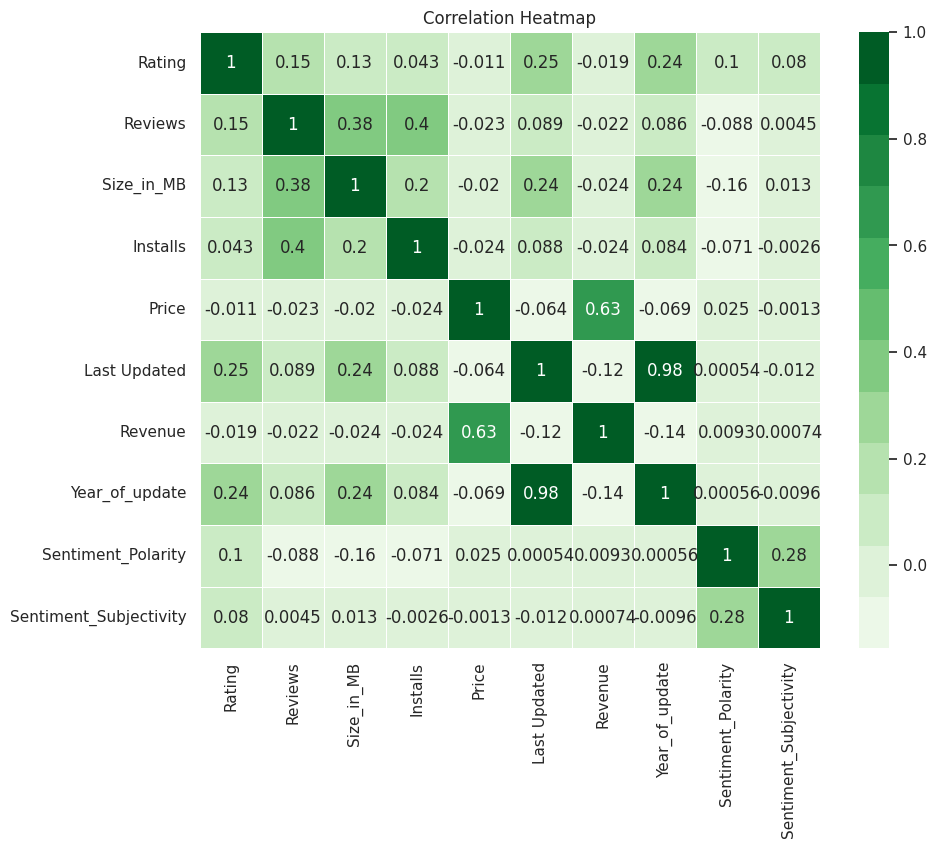

In [228]:
a=[i for i in merge_df.columns if merge_df[i].dtype!='object']
plt.figure(figsize=(10, 8))
sns.heatmap(merge_df[a].corr(), annot=True, cmap=sns.color_palette("Greens",12), linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## **5. Solution to Business Objective**

#### **What do you suggest the client to achieve Business Objective ?**
Explain Briefly.

1. **Keep Ratings High**

  -   **Aim for Ratings**: Ensure your app has a rating between 4.0 and 4.5 by regularly improving it based on user feedback.
2. **Optimize App Size**

  -  **Stay Small**: Keep your app size under 20 MB for easy downloads. If necessary, go up to 60-80 MB but no more.

3. **Use Free Apps to Attract Users**

  -  **Free with Extras**: Offer your app for free and make money through ads, in-app purchases, or subscriptions.

4. **Target Popular Categories**

  -  **Focus on Popular Types:** Develop apps in the Family and Games categories since they are highly popular and growing.

5. **Keep Users Happy**

  -  **Good Experience:** Make sure users are satisfied by fixing issues quickly and adding new features regularly.

6. **Aim for High Revenue Categories**

  -  **Target Revenue:** Create apps in the Lifestyle and Games categories, which tend to make the most money.

7. **Boost Install Rates**

  -  **Get More Reviews:** Encourage users to leave positive reviews to attract more installs.

  -  **Regular Updates:** Update the app regularly to keep it running smoothly and retain user interest.

8. **Address Negative Feedback**

  -  **Fix Problems:** Pay attention to negative feedback and make improvements to address user concerns.

  -  **Engage with Users:** Respond to user comments and show that you are working to improve the app.

9. **Use Targeted Marketing**

  -  **Smart Advertising:** Advertise your app to the right audience based on their preferences and habits.

10. **Stand Out**'

  -  **Unique Features:** Add unique features that make your app different from others.
  -  **User-Friendly Design:** Ensure your app is easy and enjoyable to use.

# **Conclusion**

**High User Satisfaction**: Most apps are rated between 4.0 and 4.5, indicating high user satisfaction. Apps with high ratings also tend to have the highest number of installs.

**App Size and Downloads**: Smaller apps (0-20 MB) are more accessible and easier to download, leading to higher adoption rates. However, apps in the 60-80 MB size range tend to have the highest average installs, suggesting that users are willing to download larger apps if they offer valuable features.

**Free vs Paid Apps**: Free apps dominate the market in terms of number and downloads. They attract a larger user base, which can be monetized through in-app advertisements, subscriptions, or purchases.

**Genre Popularity**: The Family, Games, and Tools categories have the most apps and highest installs. These categories show strong user engagement and satisfaction.

**Revenue Insights**: The Lifestyle, Family, and Game categories generate the highest revenue. High-priced, niche apps and popular games are top revenue generators.

**Sentiment Analysis**: Most user reviews are positive, with a notable portion of negative sentiments. Categories like Food & Drink and Health & Fitness have the highest average sentiment polarity, while Maps & Navigation and News & Magazines have lower polarity.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***